In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pd.set_option('display.max_columns', None)

In [23]:

df = pd.read_csv('Airbnb_Data.csv')
df.head()



id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  Real Bed              strict          True  NYC   
1  Real Bed              strict          True  NYC   
2  Real Bed            moderate          True  NYC   
3  Real Bed            flexible          True   SF   
4  Real Bed            moderate          True   DC   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   18-06-2016   
1  Enjoy travelling during your stay in Manhattan...   05-08-2017   
2  The Oasis comes complete with a full backyard ...   30-04-2017   
3  This light-filled home-away-from-home is super...          NaN   
4  Cool, cozy, and comfortable studio located in ...   12-05-2015   

  host_has_profile_pic host_identity_verified host_response_rate  host_since  \
0                    t                      t                NaN  26-03-2012   
1                    t                      f               100%  19-06-2017   
2                    t                      t               100%  25-10-2016   
3                    t                      t                NaN  19-04-2015   
4                    t                      t               100%  01-03-2015   

  instant_bookable last_review   latitude   longitude  \
0                f  18-07-2016  40.696524  -73.991617   
1                t  23-09-2017  40.766115  -73.989040   
2                t  14-09-2017  40.808110  -73.943756   
3                f         NaN  37.772004 -122.431619   
4                t  22-01-2017  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  \
0                  2                 100.0   
1                  6                  93.0   
2                 10                  92.0   
3                  0                   NaN   
4                  4                  40.0   

                                       thumbnail_url zipcode  bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201       1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019       3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027       1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117       2.0   2.0  
4                                                NaN   20009       0.0   1.0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [25]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [26]:
df.drop(['thumbnail_url', 'description'], axis=1, inplace=True)

# df.dropna(inplace=True)
df.dropna(subset=['host_identity_verified', 'zipcode', 'bathrooms','bedrooms', 'beds' ], inplace=True)

default_value = 'No neighbourhood'
df['neighbourhood'].fillna(default_value, inplace=True)

C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_4816\2581098931.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood'].fillna(default_value, inplace=True)


In [27]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15477
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        17725
host_since                    0
instant_bookable              0
last_review               15446
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16310
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72630 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      72630 non-null  int64  
 1   log_price               72630 non-null  float64
 2   property_type           72630 non-null  object 
 3   room_type               72630 non-null  object 
 4   amenities               72630 non-null  object 
 5   accommodates            72630 non-null  int64  
 6   bathrooms               72630 non-null  float64
 7   bed_type                72630 non-null  object 
 8   cancellation_policy     72630 non-null  object 
 9   cleaning_fee            72630 non-null  bool   
 10  city                    72630 non-null  object 
 11  first_review            57153 non-null  object 
 12  host_has_profile_pic    72630 non-null  object 
 13  host_identity_verified  72630 non-null  object 
 14  host_response_rate      54905 non-null  obj

In [29]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['beds'] = df['beds'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['instant_bookable'] = df['instant_bookable'].map({'f': False, 't': True}).astype(bool)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f': False, 't': True}).astype(bool)
df['host_identity_verified'] = df['host_identity_verified'].map({'f': False, 't': True}).astype(bool)

replacement_dict = {'NYC': 'New York', 'LA': 'Los Angeles', 'SF': 'San Francisco', 'DC' : 'Washington D.C.'}
df['city'] = df['city'].replace(replacement_dict)

print(df.dtypes)


id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                   int32
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
first_review               object
host_has_profile_pic         bool
host_identity_verified       bool
host_response_rate         object
host_since                 object
instant_bookable             bool
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                    int32
beds                        int32
dtype: object


In [30]:
# Convert date columns to datetime objects
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['host_since'] = pd.to_datetime(df['host_since'])

len(df)

C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_4816\3059365486.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['first_review'] = pd.to_datetime(df['first_review'])
C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_4816\3059365486.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'])
C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_4816\3059365486.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'])


72630

In [31]:
df = df[~(df['host_since'] > df['first_review'])]
# Show the resulting DataFrame
# df.count()
len(df)

72589

In [32]:
# filtered_df = df[df['last_review'] == df['first_review']]
filtered_df = df[(df['last_review'] != df['first_review']) & (df['number_of_reviews'] == 1) ]
len(filtered_df)

237

In [33]:
print(len(df))
df = df[~((df['last_review'] != df['first_review']) & (df['number_of_reviews'] == 1)) ]
len(df)

72589


72352

In [34]:
# for index, row in df.iterrows():
#     if pd.isnull(row['host_response_rate']) and not pd.isnull(row['first_review']):
#         # Drop the column 'host_response_rate'
#         df.drop(index, inplace=True)

#  Drop rows where 'host_response_rate' is null and 'first_review' is not null
df = df[~(pd.isnull(df['host_response_rate']) & ~pd.isnull(df['first_review']))]
print(len(df))
df = df[~(pd.isnull(df['first_review']) & ~pd.isnull(df['last_review']))]

print(len(df))
df.isnull().sum()

62884
62855


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15441
host_has_profile_pic          0
host_identity_verified        0
host_response_rate         8183
host_since                    0
instant_bookable              0
last_review               15441
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      15787
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

In [35]:
df= df[~((pd.isnull(df['review_scores_rating']) & ~pd.isnull(df['first_review'])))]
df

id  log_price property_type        room_type  \
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
5      12422935   4.442651     Apartment     Private room   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
5      {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee             city  \
1              1  Real Bed              strict          True         New York   
2              1  Real Bed            moderate          True         New York   
3              1  Real Bed            flexible          True    San Francisco   
4              1  Real Bed            moderate          True  Washington D.C.   
5              1  Real Bed              strict          True    San Francisco   
...          ...       ...                 ...           ...              ...   
74106          1  Real Bed            flexible         False         New York   
74107          2  Real Bed            moderate          True      Los Angeles   
74108          1  Real Bed            moderate          True         New York   
74109          1  Real Bed              strict          True         New York   
74110          1  Real Bed            moderate         False      Los Angeles   

      first_review  host_has_profile_pic  host_identity_verified  \
1       2017-08-05                  True                   False   
2       2017-04-30                  True                    True   
3              NaT                  True                    True   
4       2015-05-12                  True                    True   
5       2017-08-27                  True                    True   
...            ...                   ...                     ...   
74106          NaT                  True                    True   
74107   2016-08-15                  True                   False   
74108   2015-01-03                  True                    True   
74109          NaT                  True                   False   
74110   2013-09-05                  True                    True   

      host_response_rate host_since  instant_bookable last_review   latitude  \
1                   100% 2017-06-19              True  2017-09-23  40.766115   
2                   100% 2016-10-25              True  2017-09-14  40.808110   
3                    NaN 2015-04-19             False         NaT  37.772004   
4                   100% 2015-03-01              True  2017-01-22  38.925627   
5                   100% 2017-06-07              True  2017-09-05  37.753164   
...                  ...        ...               ...         ...        ...   
74106                NaN 2013-03-24      

In [36]:
print(max(df['first_review']))
print(max(df['last_review']))
max(df['host_since'])

2017-10-05 00:00:00
2017-10-05 00:00:00


Timestamp('2017-10-04 00:00:00')

In [37]:
last_date = '2017-10-31'
last_date = pd.to_datetime(last_date)
last_date

Timestamp('2017-10-31 00:00:00')

In [38]:
# df_b = df[(df['host_since'] == df['first_review'])]
# df_b

In [40]:

df['time_to_first_review'] = (df['first_review'] - df['host_since']).dt.days

duration_between_reviews = pd.DataFrame()
duration_between_reviews = (last_date - df['host_since']).dt.days

# Calculate average number of reviews per 30 days
df['reviews_per_30_days'] = (df['number_of_reviews'] / duration_between_reviews) * 30

# Display the DataFrame
df


id  log_price property_type        room_type  \
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
5      12422935   4.442651     Apartment     Private room   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
5      {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee             city  \
1              1  Real Bed              strict          True         New York   
2              1  Real Bed            moderate          True         New York   
3              1  Real Bed            flexible          True    San Francisco   
4              1  Real Bed            moderate          True  Washington D.C.   
5              1  Real Bed              strict          True    San Francisco   
...          ...       ...                 ...           ...              ...   
74106          1  Real Bed            flexible         False         New York   
74107          2  Real Bed            moderate          True      Los Angeles   
74108          1  Real Bed            moderate          True         New York   
74109          1  Real Bed              strict          True         New York   
74110          1  Real Bed            moderate         False      Los Angeles   

      first_review  host_has_profile_pic  host_identity_verified  \
1       2017-08-05                  True                   False   
2       2017-04-30                  True                    True   
3              NaT                  True                    True   
4       2015-05-12                  True                    True   
5       2017-08-27                  True                    True   
...            ...                   ...                     ...   
74106          NaT                  True                    True   
74107   2016-08-15                  True                   False   
74108   2015-01-03                  True                    True   
74109          NaT                  True                   False   
74110   2013-09-05                  True                    True   

      host_response_rate host_since  instant_bookable last_review   latitude  \
1                   100% 2017-06-19              True  2017-09-23  40.766115   
2                   100% 2016-10-25              True  2017-09-14  40.808110   
3                    NaN 2015-04-19             False         NaT  37.772004   
4                   100% 2015-03-01              True  2017-01-22  38.925627   
5                   100% 2017-06-07              True  2017-09-05  37.753164   
...                  ...        ...               ...         ...        ...   
74106                NaN 2013-03-24      

In [306]:
# duration_between_reviews.value_counts()

In [41]:
df.corr(numeric_only=True)

id  log_price  accommodates  bathrooms  \
id                      1.000000  -0.005472     -0.005160  -0.005483   
log_price              -0.005472   1.000000      0.566753   0.347587   
accommodates           -0.005160   0.566753      1.000000   0.494812   
bathrooms              -0.005483   0.347587      0.494812   1.000000   
cleaning_fee           -0.003370   0.094323      0.177510   0.050411   
host_has_profile_pic   -0.003877  -0.015878     -0.005212  -0.003283   
host_identity_verified -0.003173   0.019078      0.064034   0.013641   
instant_bookable        0.000302  -0.045366      0.049411   0.000544   
latitude               -0.000074   0.005124     -0.069101  -0.125440   
longitude               0.000703  -0.035198     -0.074799  -0.122035   
number_of_reviews       0.002542  -0.039939      0.030809  -0.045541   
review_scores_rating    0.006009   0.081186     -0.037105  -0.004983   
bedrooms               -0.007057   0.480315      0.711505   0.571466   
beds                   -0.009599   0.439078      0.811526   0.515457   
time_to_first_review   -0.003424   0.045293     -0.024095  -0.013231   
reviews_per_30_days     0.000914  -0.073478      0.048691  -0.042406   

                        cleaning_fee  host_has_profile_pic  \
id                         -0.003370             -0.003877   
log_price                   0.094323             -0.015878   
accommodates                0.177510             -0.005212   
bathrooms                   0.050411             -0.003283   
cleaning_fee                1.000000              0.024069   
host_has_profile_pic        0.024069              1.000000   
host_identity_verified      0.171093              0.076476   
instant_bookable            0.008742             -0.007928   
latitude                   -0.052166              0.002496   
longitude                  -0.060921              0.001278   
number_of_reviews           0.106007              0.022353   
review_scores_rating        0.019121              0.007372   
bedrooms                    0.101086              0.001194   
beds                        0.127566             -0.000981   
time_to_first_review        0.042316              0.011076   
reviews_per_30_days         0.101620              0.017265   

                        host_identity_verified  instant_bookable  latitude  \
id                                   -0.003173          0.000302 -0.000074   
log_price                             0.019078         -0.045366  0.005124   
accommodates                          0.064034          0.049411 -0.069101   
bathrooms                             0.013641          0.000544 -0.125440   
cleaning_fee                          0.171093          0.008742 -0.052166   
host_has_profile_pic                  0.076476         -0.007928  0.002496   
host_identity_verified                1.000000         -0.087321 -0.050433   
instant_bookable                     -0.087321          1.000000  0.002315   
latitude                             -0.050433          0.002315  1.000000   
longitude                            -0.066278          0.006421  0.896824   
number_of_reviews                     0.177376          0.065926 -0.008078   
review_scores_rating                  0.056676         -0.084419 -0.027360   
bedrooms                              0.029078         -0.008659 -0.046688   
beds                                  0.042305          0.047708 -0.071520   
time_to_first_review                  0.185657         -0.057575  0.060843   
reviews_per_30_days                   0.062893          0.159953  0.028841   

                        longitude  number_of_reviews  review_scores_rating  \
id                       0.000703           0.002542              0.006009   
log_price               -0.035198          -0.039939              0.081186   
accommodates            -0.074799           0.030809             -0.037105   
bathrooms               -0.122035          -0.045541             -0.004983   
cleaning_fee            -0.060921

In [42]:
df.describe()

id     log_price  accommodates     bathrooms  \
count  6.250900e+04  62509.000000  62509.000000  62509.000000   
mean   1.127697e+07      4.788688      3.230063      1.203955   
min    3.440000e+02      0.000000      1.000000      0.000000   
25%    6.262645e+06      4.317488      2.000000      1.000000   
50%    1.228254e+07      4.727388      2.000000      1.000000   
75%    1.640433e+07      5.231109      4.000000      1.000000   
max    2.123090e+07      7.600402     16.000000      8.000000   
std    6.087155e+06      0.727804      2.227712      0.563564   

                        first_review                     host_since  \
count                          47068                          62509   
mean   2016-01-25 20:57:01.024900096  2014-08-05 21:19:32.970292480   
min              2009-01-20 00:00:00            2008-03-03 00:00:00   
25%              2015-06-23 00:00:00            2013-05-02 00:00:00   
50%              2016-06-16 00:00:00            2014-10-20 00:00:00   
75%              2017-01-30 00:00:00            2016-01-19 00:00:00   
max              2017-10-05 00:00:00            2017-10-04 00:00:00   
std                              NaN                            NaN   

                         last_review      latitude     longitude  \
count                          47068  62509.000000  62509.000000   
mean   2017-05-10 16:59:34.606951936     38.346990    -93.088764   
min              2010-07-17 00:00:00     33.338905   -122.511500   
25%              2017-04-07 00:00:00     34.110144   -118.345910   
50%              2017-05-07 00:00:00     40.643368    -77.020619   
75%              2017-09-15 00:00:00     40.746676    -73.954956   
max              2017-10-05 00:00:00     42.390437    -70.985047   
std                              NaN      3.128149     21.742645   

       number_of_reviews  review_scores_rating      bedrooms          beds  \
count       62509.000000          47068.000000  62509.000000  62509.000000   
mean           23.324721             94.223761      1.281511      1.750420   
min             0.000000             20.000000      0.000000      0.000000   
25%             1.000000             92.000000      1.000000      1.000000   
50%             7.000000             96.000000      1.000000      1.000000   
75%            28.000000             99.000000      1.000000      2.000000   
max           605.000000            100.000000     10.000000     18.000000   
std            40.054667              7.161278      0.870542      1.295283   

       time_to_first_review  reviews_per_30_days  
count          47068.000000         62509.000000  
mean             582.605252             0.670020  
min                0.000000             0.000000  
25%               82.000000             0.013321  
50%              401.000000             0.220183  
75%              934.000000             0.868762  
max             3287.000000            13.324251  
std              579.512654             1.043966

In [43]:
df_priceZero = df[df['log_price'] == 0]
df_priceZero

id  log_price property_type    room_type  \
11632  17972519        0.0   Condominium  Shared room   

                                               amenities  accommodates  \
11632  {TV,"Wireless Internet","Air conditioning",Kit...             1   

       bathrooms  bed_type cancellation_policy  cleaning_fee      city  \
11632          1  Real Bed              strict          True  New York   

      first_review  host_has_profile_pic  host_identity_verified  \
11632   2017-08-17                  True                   False   

      host_response_rate host_since  instant_bookable last_review   latitude  \
11632               100% 2017-07-20              True  2017-10-01  40.838054   

       longitude            name neighbourhood  number_of_reviews  \
11632 -73.858665  Esteem's Place   Parkchester                  3   

       review_scores_rating zipcode  bedrooms  beds  time_to_first_review  \
11632                  87.0   10462         1     1                  28.0   

       reviews_per_30_days  
11632             0.873786

In [44]:
df= df[~(df['log_price'] == 0)]
len(df)
# df_priceZero

62508

In [50]:
# # Calculate the mean value of 'review_scores_rating'
# mean_rating = df['review_scores_rating'].mean()

# # Fill missing values in 'review_scores_rating' based on conditions
# mask = (df['first_review'].notnull()) & (df['review_scores_rating'].isnull())
# df.loc[mask, 'review_scores_rating'] = mean_rating
# df.isnull().sum()

In [51]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15441
host_has_profile_pic          0
host_identity_verified        0
host_response_rate         8183
host_since                    0
instant_bookable              0
last_review               15441
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      15441
zipcode                       0
bedrooms                      0
beds                          0
time_to_first_review      15441
reviews_per_30_days           0
dtype: int64

In [52]:
file_path = 'Airbnb_data_clean.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

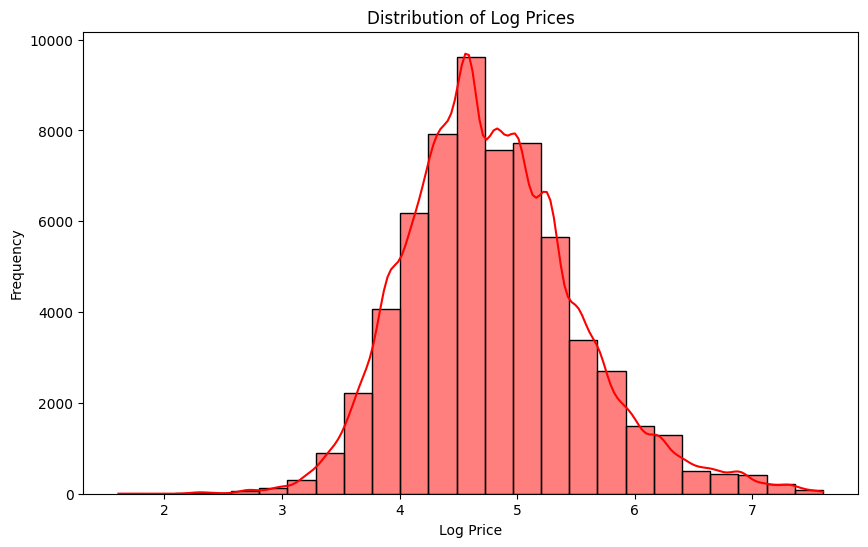

In [312]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=25, kde=True, color='red')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log Prices')
plt.show()


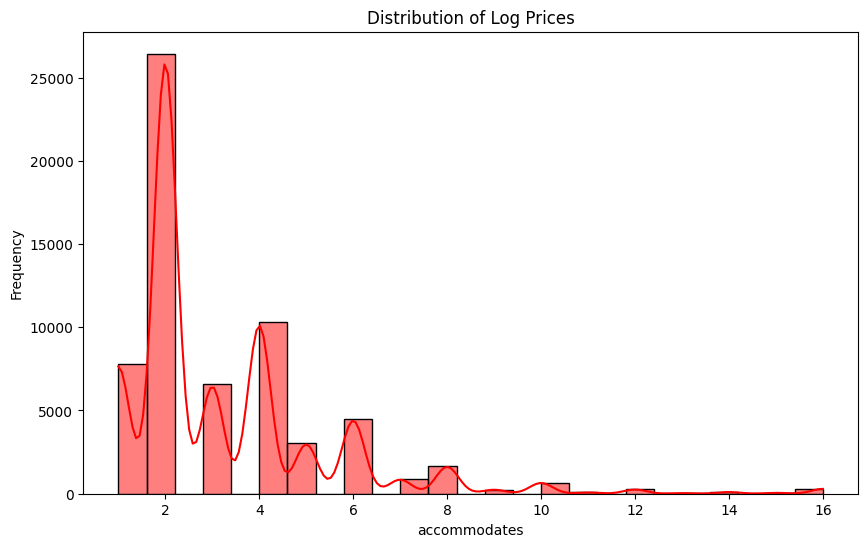

In [354]:
plt.figure(figsize=(10, 6))
sns.histplot(df['accommodates'], bins=25, kde=True, color='red')
plt.xlabel('accommodates')
plt.ylabel('Frequency')
plt.title('Distribution of Log Prices')
plt.show()

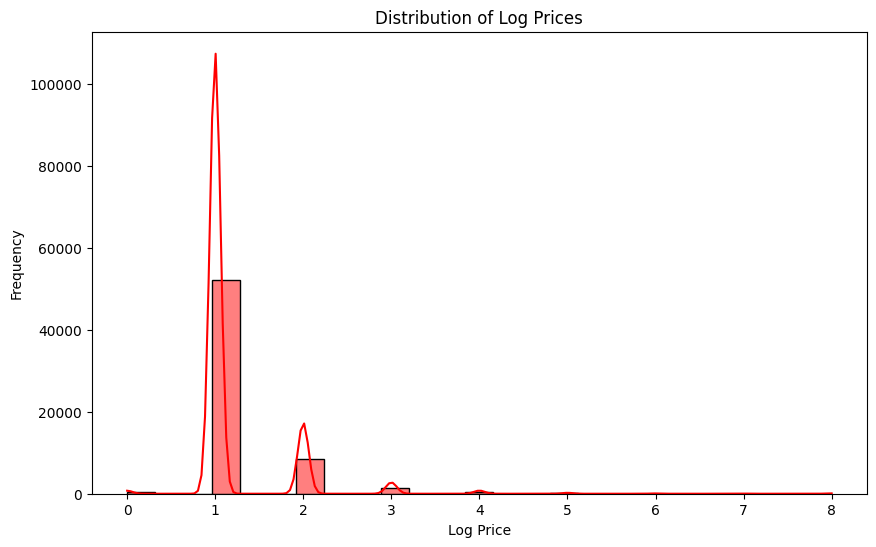

In [357]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bathrooms'], bins=25, kde=True, color='red')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log Prices')
plt.show()


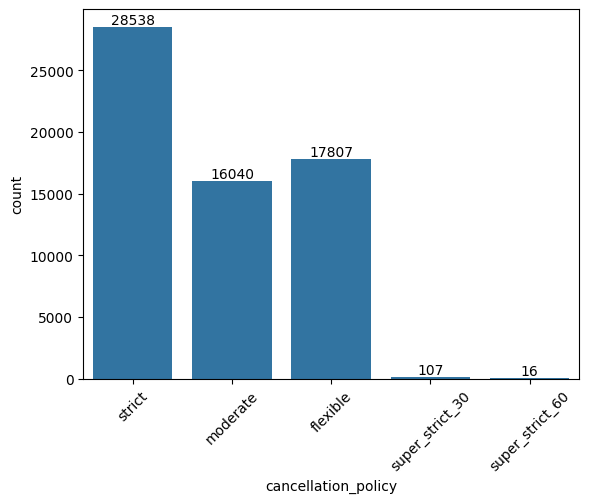

In [53]:
ax = sns.countplot(x = 'cancellation_policy',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.show()

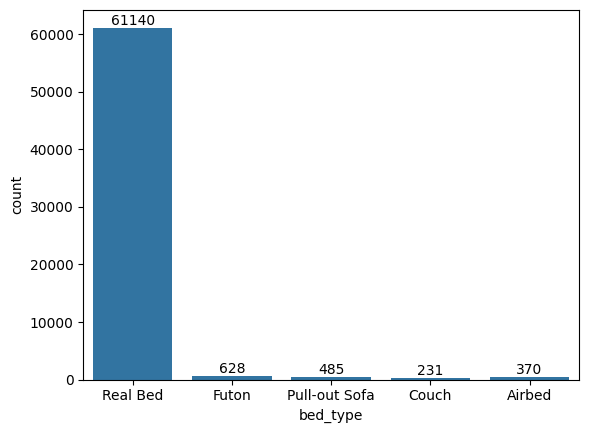

In [314]:
ax = sns.countplot(x = 'bed_type',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

['Entire home/apt' 'Private room' 'Shared room']


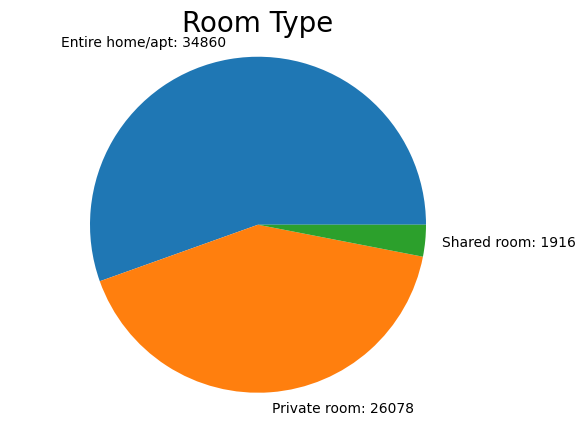

In [315]:
unique_rooms = df['room_type'].unique()
print(unique_rooms)
room_type_counts = df['room_type'].value_counts()

labels  = []
for i, count in enumerate(room_type_counts):
     val = f'{unique_rooms[i]}: {count}'
     labels.append(val)

plt.pie(room_type_counts, labels = labels)

plt.title("Room Type", fontsize = 20)
plt.axis('equal')
plt.show() 

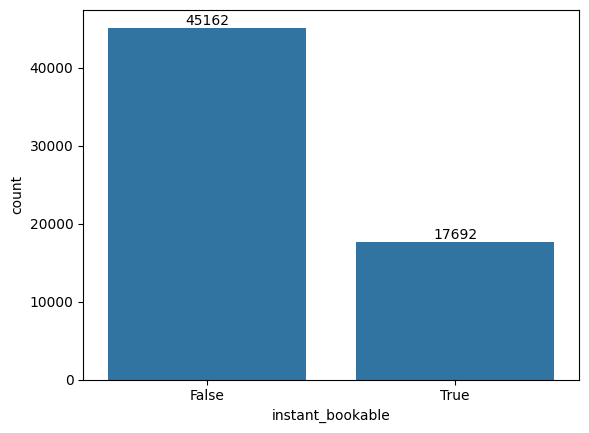

In [316]:
ax = sns.countplot(x = 'instant_bookable',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

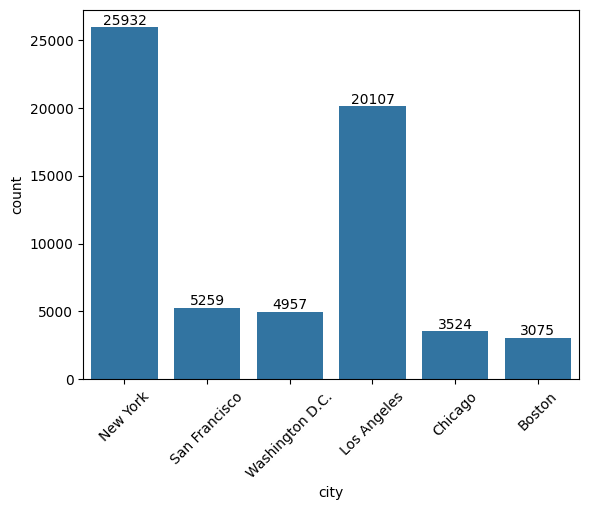

In [317]:
ax = sns.countplot(x = 'city',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.show()

In [318]:
df_neigh = pd.DataFrame()
df_neigh = df[['neighbourhood', 'city']]


df_neigh['neighbourhood_category'] = df_neigh['neighbourhood'].apply(lambda x: 'No neighbourhood' if x == 'No neighbourhood' else 'Others')

# Display the modified DataFrame with the new column
# df_neigh['neighbourhood_category'].value_counts()



C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\3906530675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neigh['neighbourhood_category'] = df_neigh['neighbourhood'].apply(lambda x: 'No neighbourhood' if x == 'No neighbourhood' else 'Others')


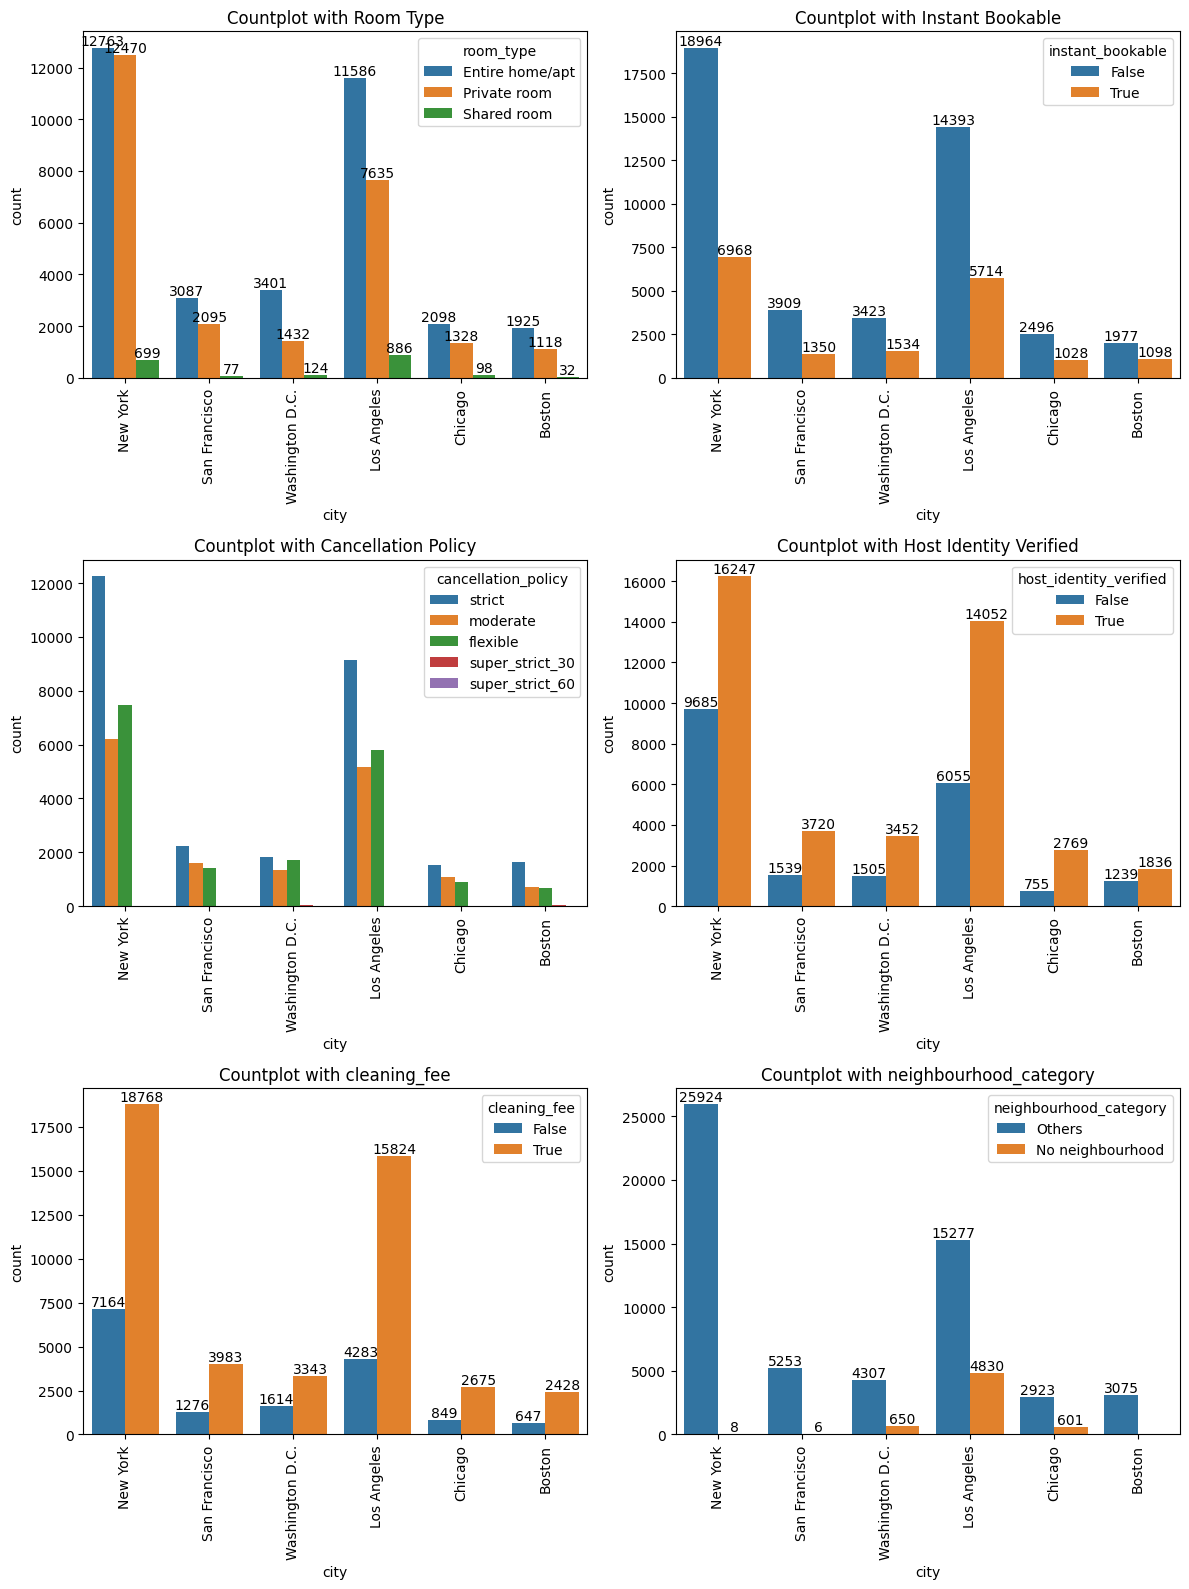

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Airbnb dataset

# Create subplots for a 2x2 grid
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

# Countplot with 'city' as x-axis and 'room_type' as hue variable
sns.countplot(data=df, x='city', hue='room_type', ax=axs[0, 0])
axs[0, 0].set_title('Countplot with Room Type')
axs[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for this subplot
for bars in axs[0, 0].containers:
        axs[0, 0].bar_label(bars)

# Countplot with 'city' as x-axis and 'instant_bookable' as hue variable
sns.countplot(data=df, x='city', hue='instant_bookable', ax=axs[0, 1])
axs[0, 1].set_title('Countplot with Instant Bookable')
axs[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for this subplot
for bars in axs[0, 1].containers:
        axs[0, 1].bar_label(bars)

# Countplot with 'city' as x-axis and 'cancellation_policy' as hue variable
sns.countplot(data=df, x='city', hue='cancellation_policy', ax=axs[1, 0])
axs[1, 0].set_title('Countplot with Cancellation Policy')
axs[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for this subplot

# Countplot with 'city' as x-axis and 'host_identity_verified' as hue variable
sns.countplot(data=df, x='city', hue='host_identity_verified', ax=axs[1, 1])
axs[1, 1].set_title('Countplot with Host Identity Verified')
axs[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for this subplot
for bars in axs[1, 1].containers:
        axs[1, 1].bar_label(bars)


sns.countplot(data=df, x='city', hue='cleaning_fee', ax=axs[2, 0])
axs[2, 0].set_title('Countplot with cleaning_fee')
axs[2, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for this subplot
for bars in axs[2, 0].containers:
        axs[2, 0].bar_label(bars)

        
sns.countplot(data = df_neigh, x = 'city', hue = 'neighbourhood_category', ax=axs[2, 1])
axs[2, 1].set_title('Countplot with neighbourhood_category')
axs[2, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for this subplot
for bars in axs[2, 1].containers:
        axs[2, 1].bar_label(bars)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [359]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15441
host_has_profile_pic          0
host_identity_verified        0
host_response_rate         8183
host_since                    0
instant_bookable              0
last_review               15441
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      15787
zipcode                       0
bedrooms                      0
beds                          0
time_to_first_review      15441
reviews_per_30_days           0
total_amenities               0
dtype: int64

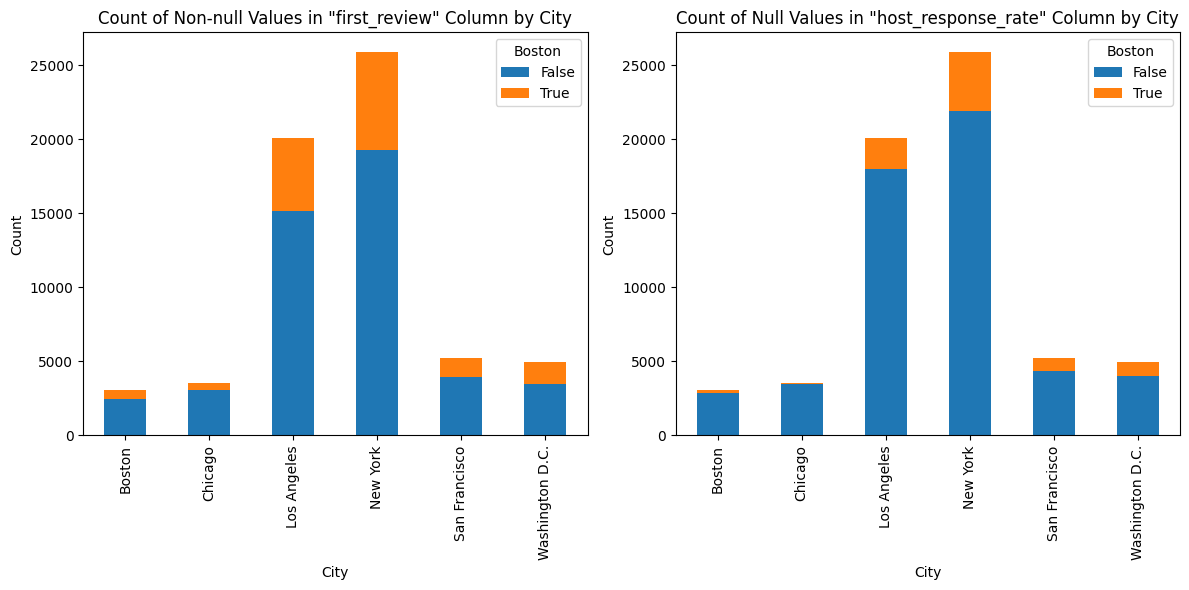

In [320]:

# Group by 'city' and count null and non-null values in 'first_review' column
grouped = df.groupby('city')['first_review'].apply(lambda x: x.isnull().value_counts())
grouped_2 = df.groupby('city')['host_response_rate'].apply(lambda x: x.isnull().value_counts())

# Plot two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first subplot (count of null values)
grouped.unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Non-null Values in "first_review" Column by City')

# Plot the second subplot (count of non-null values)
grouped_2.unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Null Values in "host_response_rate" Column by City')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [321]:
# grouped = df.groupby('city')['host_response_rate'].apply(lambda x: x.isnull().value_counts())

# # Plot the bar graph for each city
# fig, ax = plt.subplots()
# grouped.unstack().plot(kind='bar', stacked=True, ax=ax)
# ax.set_xlabel('City')
# ax.set_ylabel('Count')
# ax.set_title('Count of Null and Non-null Values in "host_response_rate" column by City')
# plt.show()

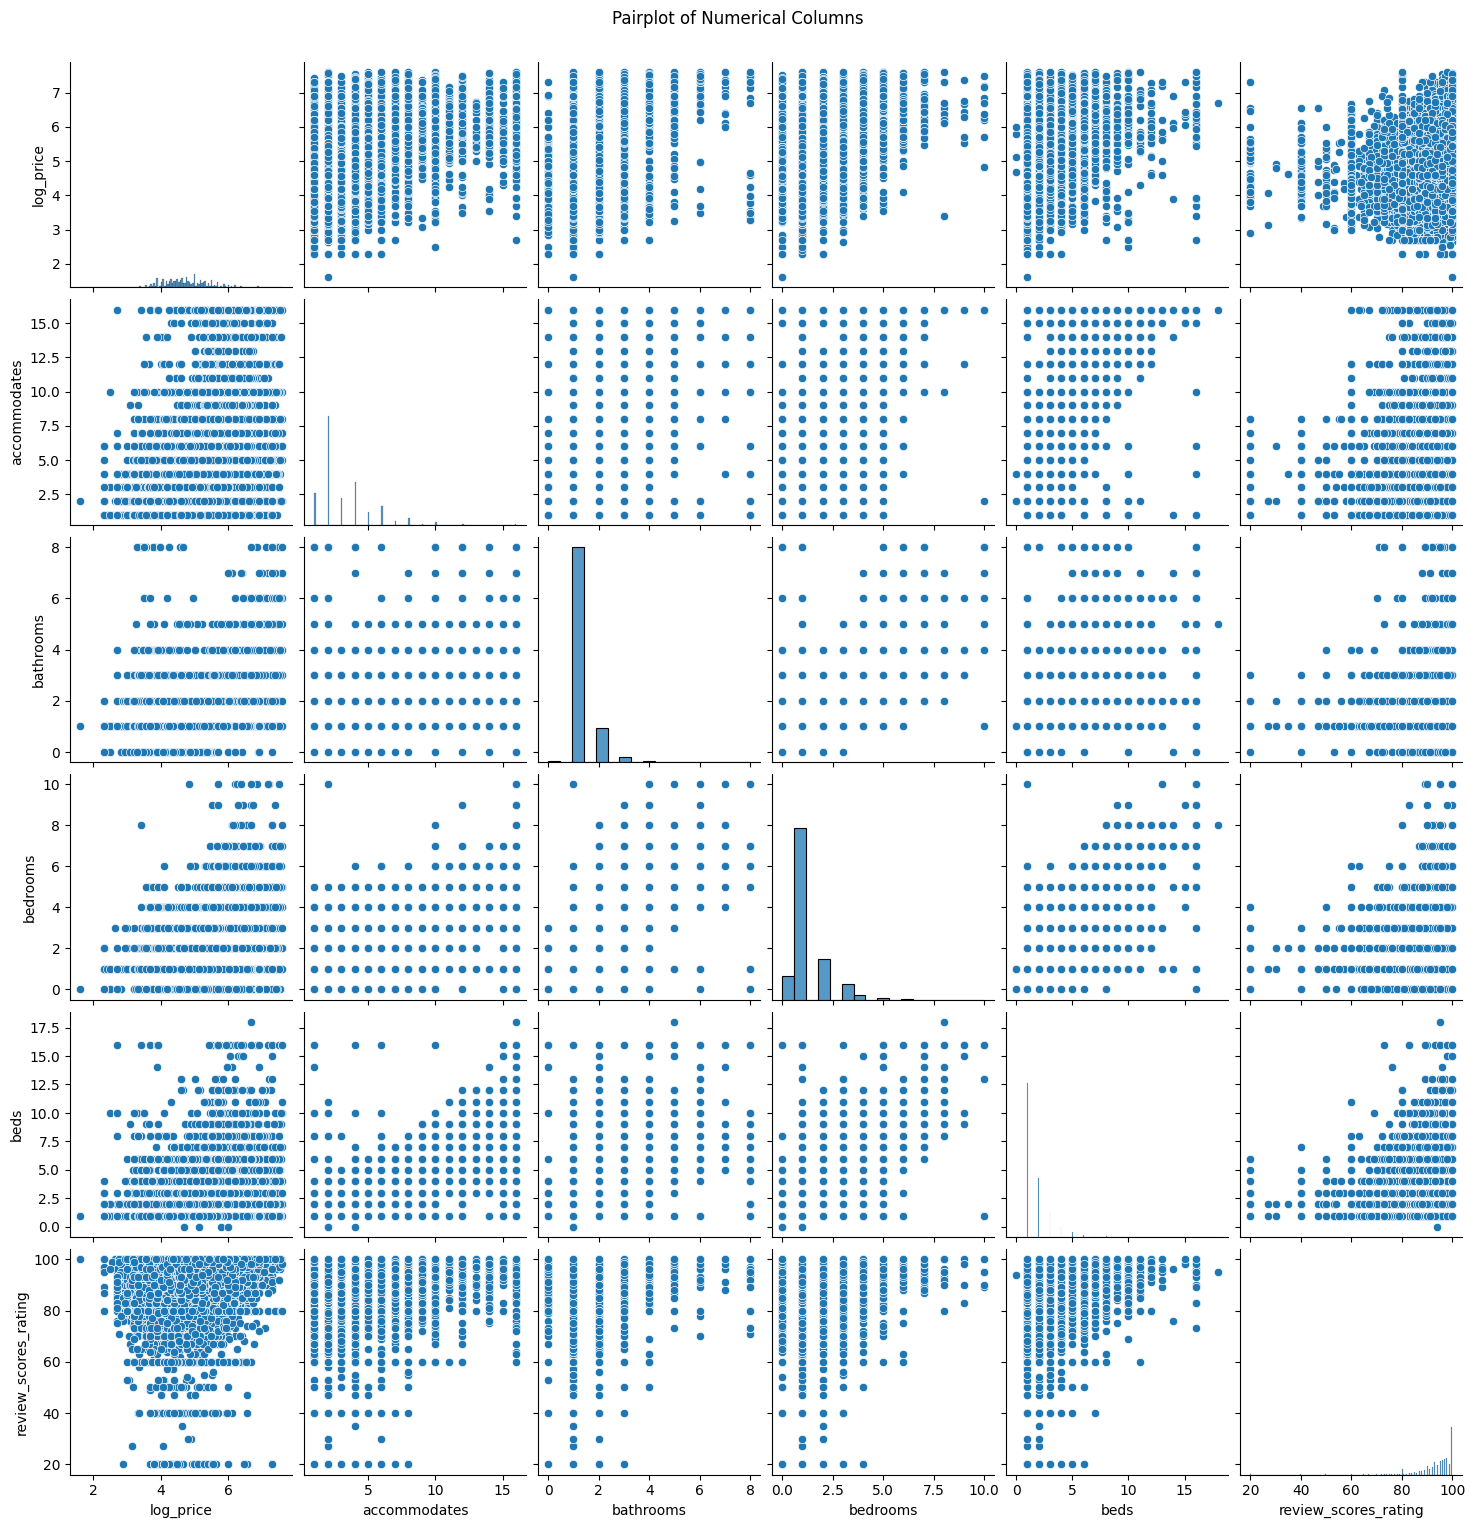

In [322]:
numerical_columns = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()


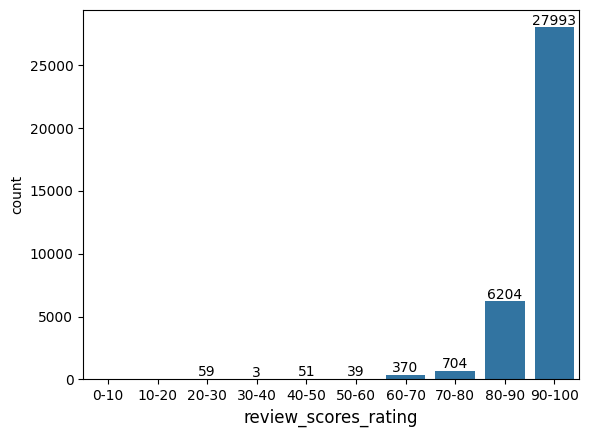

In [323]:
import seaborn as sns
import pandas as pd
import numpy as np

# Example DataFrame
df_copy = pd.DataFrame()

# Define the bins for labeling
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for the bin labels
df_copy['rating_bins'] = pd.cut(df['review_scores_rating'], bins=bins, labels=labels, right=False)

# Plot the countplot
ax = sns.countplot(x='rating_bins', data=df_copy)

# Label the bars
for bars in ax.containers:
    ax.bar_label(bars)
    
# Show the plot
plt.xlabel('review_scores_rating', fontsize=12)
plt.show()


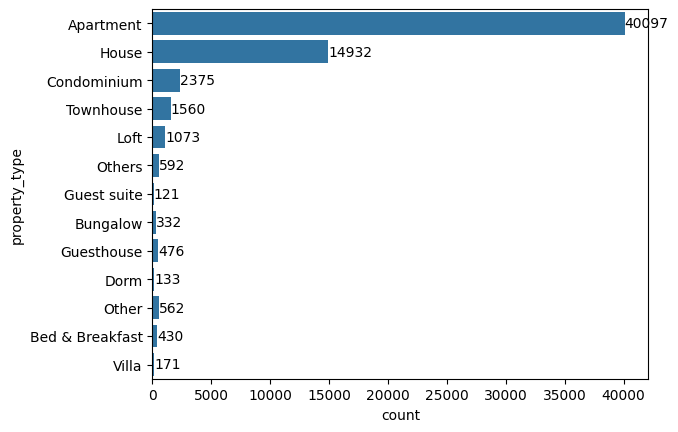

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'property_type' column exists in your DataFrame df

# Calculate the counts of each property type
property_counts = df['property_type'].value_counts()

# Define the threshold below which property types will be categorized as 'Others'
threshold = 100  # Change this threshold as needed

# Select the property types to be labeled as 'Others'
others = property_counts[property_counts < threshold].index

# Create a copy of the DataFrame
df_copy = df.copy()

# Replace those property types with 'Others' in the copied DataFrame
df_copy.loc[df_copy['property_type'].isin(others), 'property_type'] = 'Others'

# Plot the countplot
ax = sns.countplot(y='property_type', data=df_copy)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()


In [325]:
df

id  log_price property_type        room_type  \
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
5      12422935   4.442651     Apartment     Private room   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
5      {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee             city  \
1              1  Real Bed              strict          True         New York   
2              1  Real Bed            moderate          True         New York   
3              1  Real Bed            flexible          True    San Francisco   
4              1  Real Bed            moderate          True  Washington D.C.   
5              1  Real Bed              strict          True    San Francisco   
...          ...       ...                 ...           ...              ...   
74106          1  Real Bed            flexible         False         New York   
74107          2  Real Bed            moderate          True      Los Angeles   
74108          1  Real Bed            moderate          True         New York   
74109          1  Real Bed              strict          True         New York   
74110          1  Real Bed            moderate         False      Los Angeles   

      first_review  host_has_profile_pic  host_identity_verified  \
1       2017-08-05                  True                   False   
2       2017-04-30                  True                    True   
3              NaT                  True                    True   
4       2015-05-12                  True                    True   
5       2017-08-27                  True                    True   
...            ...                   ...                     ...   
74106          NaT                  True                    True   
74107   2016-08-15                  True                   False   
74108   2015-01-03                  True                    True   
74109          NaT                  True                   False   
74110   2013-09-05                  True                    True   

      host_response_rate host_since  instant_bookable last_review   latitude  \
1                   100% 2017-06-19              True  2017-09-23  40.766115   
2                   100% 2016-10-25              True  2017-09-14  40.808110   
3                    NaN 2015-04-19             False         NaT  37.772004   
4                   100% 2015-03-01              True  2017-01-22  38.925627   
5                   100% 2017-06-07              True  2017-09-05  37.753164   
...                  ...        ...               ...         ...        ...   
74106                NaN 2013-03-24      

In [326]:
df['amenities'] = df['amenities'].str.replace('{', '').str.replace('}', '').str.replace('"', '')
df['amenities']	

C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\2164896310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amenities'] = df['amenities'].str.replace('{', '').str.replace('}', '').str.replace('"', '')


1        Wireless Internet,Air conditioning,Kitchen,Hea...
2        TV,Cable TV,Wireless Internet,Air conditioning...
3        TV,Cable TV,Internet,Wireless Internet,Kitchen...
4        TV,Internet,Wireless Internet,Air conditioning...
5        TV,Wireless Internet,Heating,Smoke detector,Ca...
                               ...                        
74106                                                     
74107    TV,Cable TV,Internet,Wireless Internet,Kitchen...
74108    TV,Internet,Wireless Internet,Air conditioning...
74109    TV,Wireless Internet,Air conditioning,Kitchen,...
74110    TV,Internet,Wireless Internet,Kitchen,Free par...
Name: amenities, Length: 62854, dtype: object

In [327]:
import pandas as pd

df_amenities_count = pd.DataFrame(df['amenities'])

df_amenities_count['amenities'] = df_amenities_count['amenities'].str.split(',')
# Explode the 'amenities' column into separate rows
df_amenities_count = df_amenities_count.explode('amenities')
amenities_count = df_amenities_count['amenities'].value_counts()

# amenities_count


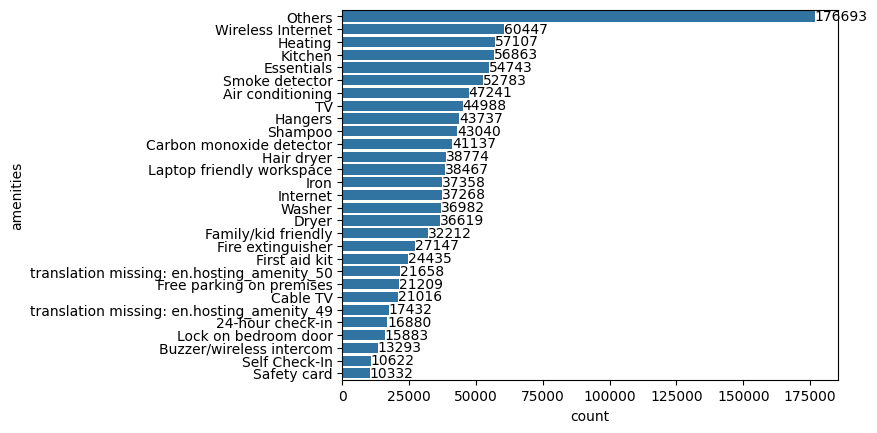

In [328]:

threshold = 10000  # Change this threshold as needed

# Select the property types to be labeled as 'Others'
others = amenities_count[amenities_count < threshold].index

# Create a copy of the DataFrame
df_copy = df_amenities_count.copy()

# Replace those property types with 'Others' in the copied DataFrame
df_copy.loc[df_copy['amenities'].isin(others), 'amenities'] = 'Others'

order = df_copy['amenities'].value_counts().index
# Plot the countplot
ax = sns.countplot(y='amenities', order=order, data=df_copy)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()


In [329]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the name of the column

# Function to count comma-separated values in each cell
def count_comma_separated(cell):
    if cell.strip() == '':  # Check if cell is an empty string
        return 0
    else:
        return cell.count(',') + 1

# Apply the function to each cell in the column
df['total_amenities'] = df['amenities'].apply(count_comma_separated)
df['total_amenities'] = df['total_amenities'].astype(int)

# count_total_1 = df[df['total_amenities'] == 1]
# # Display the DataFrame with the count of comma-separated values
# count_total_1
# df
# df['total_aminities'].value_counts()

C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\2376916615.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amenities'] = df['amenities'].apply(count_comma_separated)
C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\2376916615.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amenities'] = df['total_amenities'].astype(int)


In [330]:
import geopandas as gpd
from shapely.geometry import Point

In [331]:
# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")


C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\254177775.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


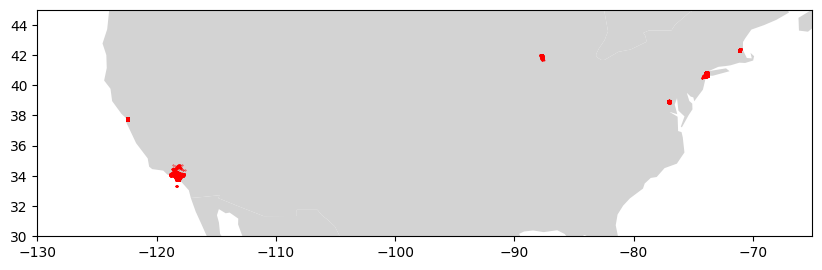

In [332]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 6), color='lightgray')

# Plot the GeoDataFrame on top of the world map
gdf.plot(ax=ax, color='red', markersize=0.1)

plt.xlim(-130, -65)
plt.ylim(30, 45)
# Show the plot
plt.show()


C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\2095520934.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


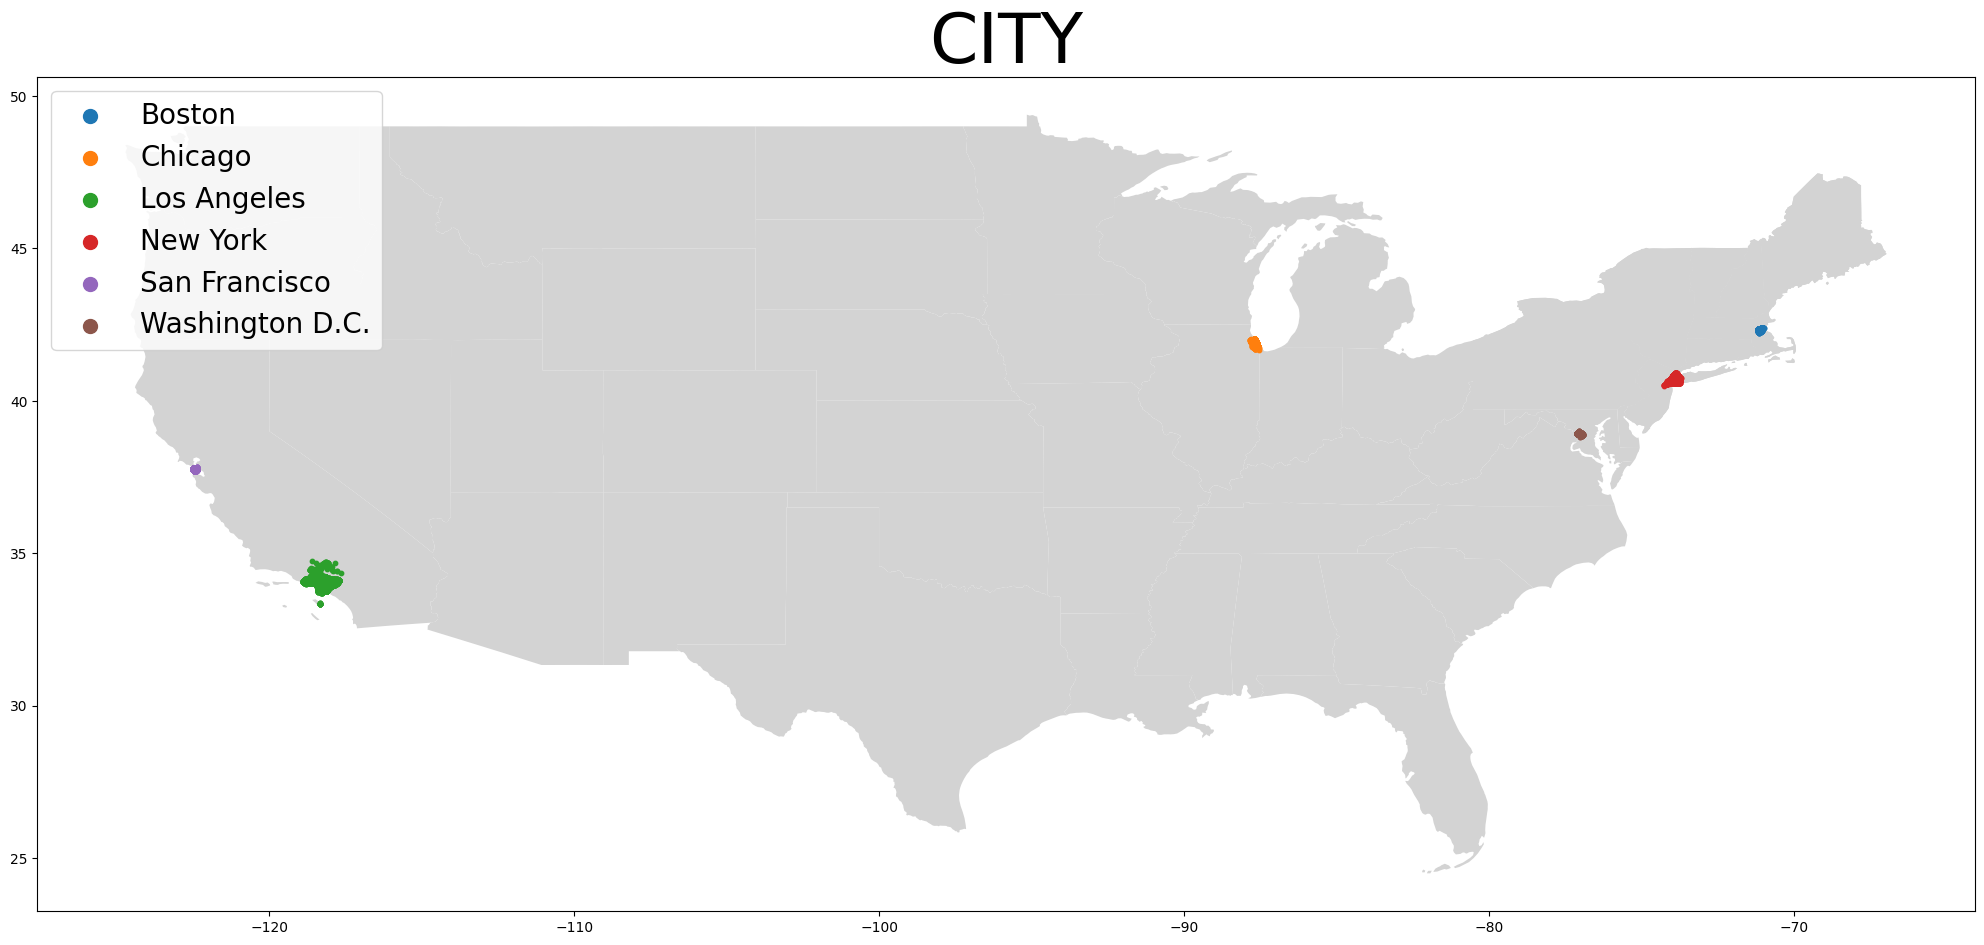

In [333]:
# cb_2022_us_nation_20m
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Load USA boundary data
usa = gpd.read_file('usa-states-census-2014.shp')


# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]


# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

grouped = gdf.groupby('city')


# Filter points within the boundary of the USA
# gdf_within_usa = gdf[gdf.within(usa.geometry.iloc[0])]

# Plot the USA boundary
ax = usa.plot(figsize=(25, 15), color='lightgray')

# Plot the points within the USA boundary
# gdf.plot(ax=ax, color='red', markersize=0.01)
for city, group in grouped:
    group.plot(ax=ax, markersize=10, label=city)


legend_handles, _ = ax.get_legend_handles_labels()
legend = ax.legend(legend_handles, grouped.groups.keys(), loc='upper left', fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([100])

plt.title('CITY', fontsize= 50)
# plt.xlim(-130, -65)
# plt.ylim(30, 45)
plt.show()


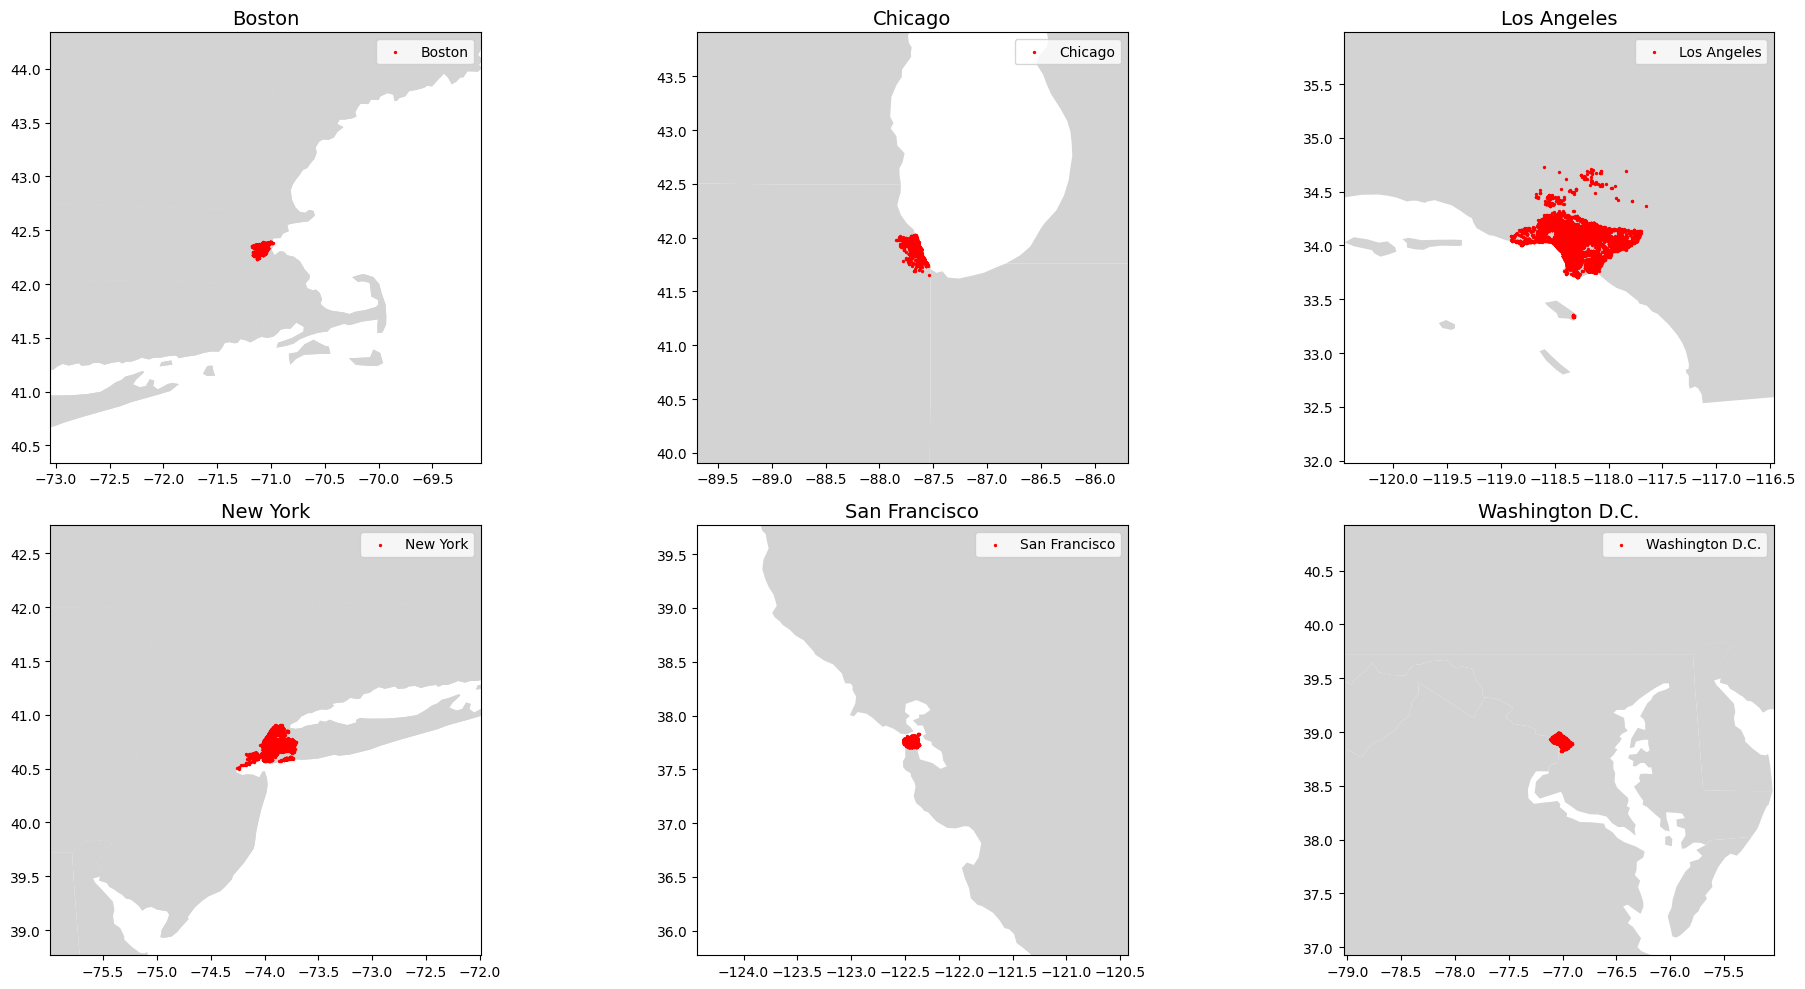

In [334]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Load USA boundary data
usa = gpd.read_file('usa-states-census-2014.shp')

# Example DataFrame with latitude, longitude, and city_name columns
# data = {'latitude': [40.7128, 34.0522, 41.8781, 34.0522, 41.8781],
#         'longitude': [-74.0060, -118.2437, -87.6298, -118.2437, -87.6298],
#         'city': ['New York', 'Los Angeles', 'Chicago', 'Los Angeles', 'Chicago']}
# df = pd.DataFrame(data)

# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Group the GeoDataFrame by city
grouped = gdf.groupby('city')

# Define number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))



# Iterate over each city and plot it on a separate subplot
for (city, group), ax in zip(grouped, axes.flatten()):
    # Plot the USA boundary
    usa.plot(ax=ax, color='lightgray')
    # Plot points for the city
    group.plot(ax=ax, markersize=2, label=city, color='red')
    # Set subplot title
    ax.set_title(city, fontsize=14)
    # Add legend
    ax.legend()
    # Get city coordinates
    city_coords = group.geometry.centroid.values[0]
    # Set limits for x-axis and y-axis to zoom in on the city
    ax.set_xlim(city_coords.x - 2, city_coords.x + 2)
    ax.set_ylim(city_coords.y - 2, city_coords.y + 2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\1033599232.py:50: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


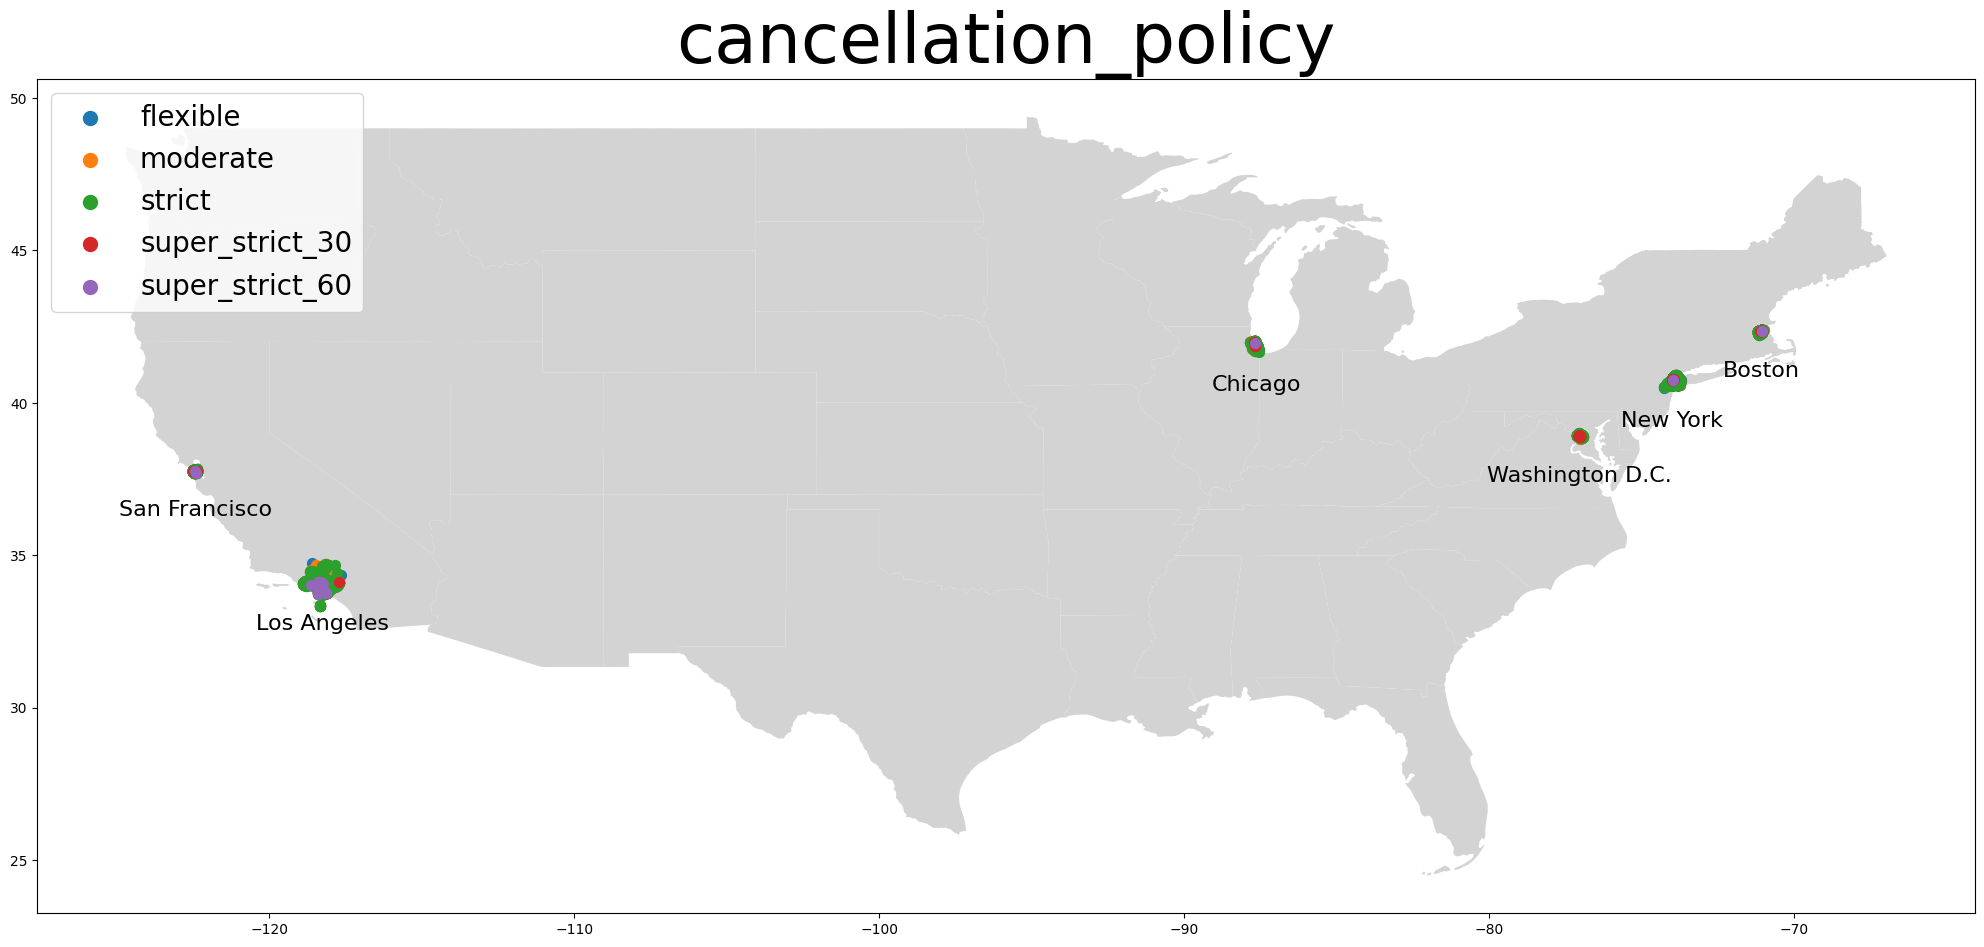

In [335]:
# cb_2022_us_nation_20m
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Load USA boundary data
usa = gpd.read_file('usa-states-census-2014.shp')

# Example DataFrame with latitude and longitude columns
# data = {'latitude': [40.7128], 'longitude': [-74.0060]}
# df = pd.DataFrame(data)

# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]


# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

grouped = gdf.groupby('cancellation_policy')


# Filter points within the boundary of the USA
# gdf_within_usa = gdf[gdf.within(usa.geometry.iloc[0])]

# Plot the USA boundary
ax = usa.plot(figsize=(25, 15), color='lightgray')

# Plot the points within the USA boundary
# gdf.plot(ax=ax, color='red', markersize=0.01)
for cancellation_policy, group in grouped:
    group.plot(ax=ax, markersize=50, label=cancellation_policy)


text_points = {
   'New York': (-74.0060, 40.7128),
   'Los Angeles': (-118.2437, 34.0522),
   'Chicago': (-87.6298, 41.8781),
   'Boston': (-71.0589, 42.3601),
   'Washington D.C.': (-77.0369, 38.9072),
   'San Francisco': (-122.4194, 37.7749)
}

for text_city, text_point in text_points.items():
    ax.text(text_point[0], text_point[1]-1.3, text_city, fontsize=16, color='black', ha='center', va='center')

legend_handles, _ = ax.get_legend_handles_labels()
legend = ax.legend(legend_handles, grouped.groups.keys(), loc='upper left', fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([100])

# ax.text(city_coords.x, city_coords.y, city, fontsize=12, color='black', ha='center', va='center')


plt.title('cancellation_policy', fontsize= 50)
plt.show()


C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\3405718683.py:54: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  policy_group.plot(ax=ax, markersize=5, label=policy)


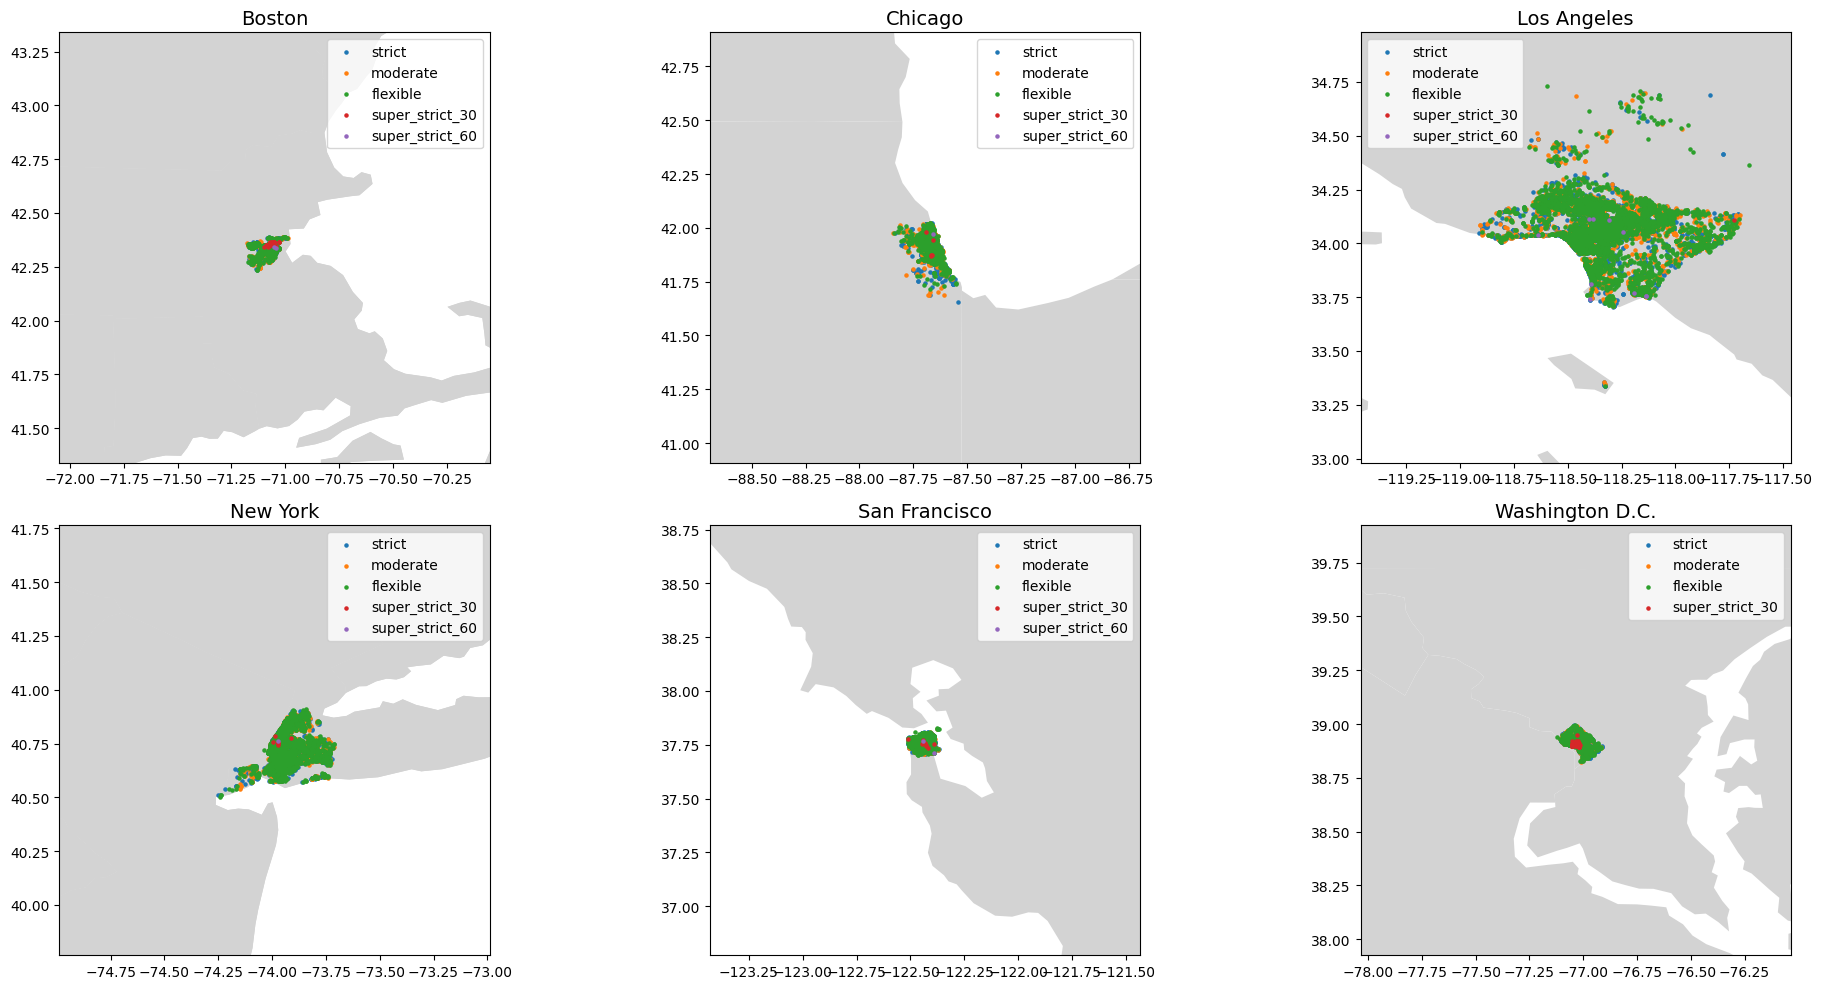

In [336]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Load USA boundary data
usa = gpd.read_file('usa-states-census-2014.shp')

# Example DataFrame with latitude, longitude, city, and cancellation policy columns
# data = {
#     'latitude': [40.7128, 34.0522, 41.8781, 34.0522, 41.8781],
#     'longitude': [-74.0060, -118.2437, -87.6298, -118.2437, -87.6298],
#     'city': ['New York', 'Los Angeles', 'Chicago', 'Los Angeles', 'Chicago'],
#     'cancellation_policy': ['moderate', 'strict', 'flexible', 'moderate', 'strict']
# }
# df = pd.DataFrame(data)

# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Group the GeoDataFrame by city
grouped = gdf.groupby('city')

# Get all unique cancellation policies
all_policies = df['cancellation_policy'].unique()

# Define colors for each cancellation policy
policy_colors = {'moderate': 'blue', 'strict': 'red', 'flexible': 'green', 'super_strict_30': 'yellow', 'super_strict_60': 'pink'}  # Add more colors as needed

# Define number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten axes if necessary
if num_rows == 1 and num_cols == 1:
    axes = [axes]

# Iterate over each city and plot it on a separate subplot
for (city, group), ax in zip(grouped, axes.flatten()):
    # Plot the USA boundary
    usa.plot(ax=ax, color='lightgray')
    # Set subplot title
    ax.set_title(city, fontsize=14)
    
    # Iterate over each cancellation policy and plot it with its respective color
    for policy in all_policies:
        policy_group = group[group['cancellation_policy'] == policy]
        policy_group.plot(ax=ax, markersize=5, label=policy)
    
    # Add legend
    ax.legend()

    # Get city coordinates
    city_coords = group.geometry.centroid.values[0]

    # Set limits for x-axis and y-axis to zoom in on the city
    ax.set_xlim(city_coords.x - 1, city_coords.x + 1)
    ax.set_ylim(city_coords.y - 1, city_coords.y + 1)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\977150245.py:55: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


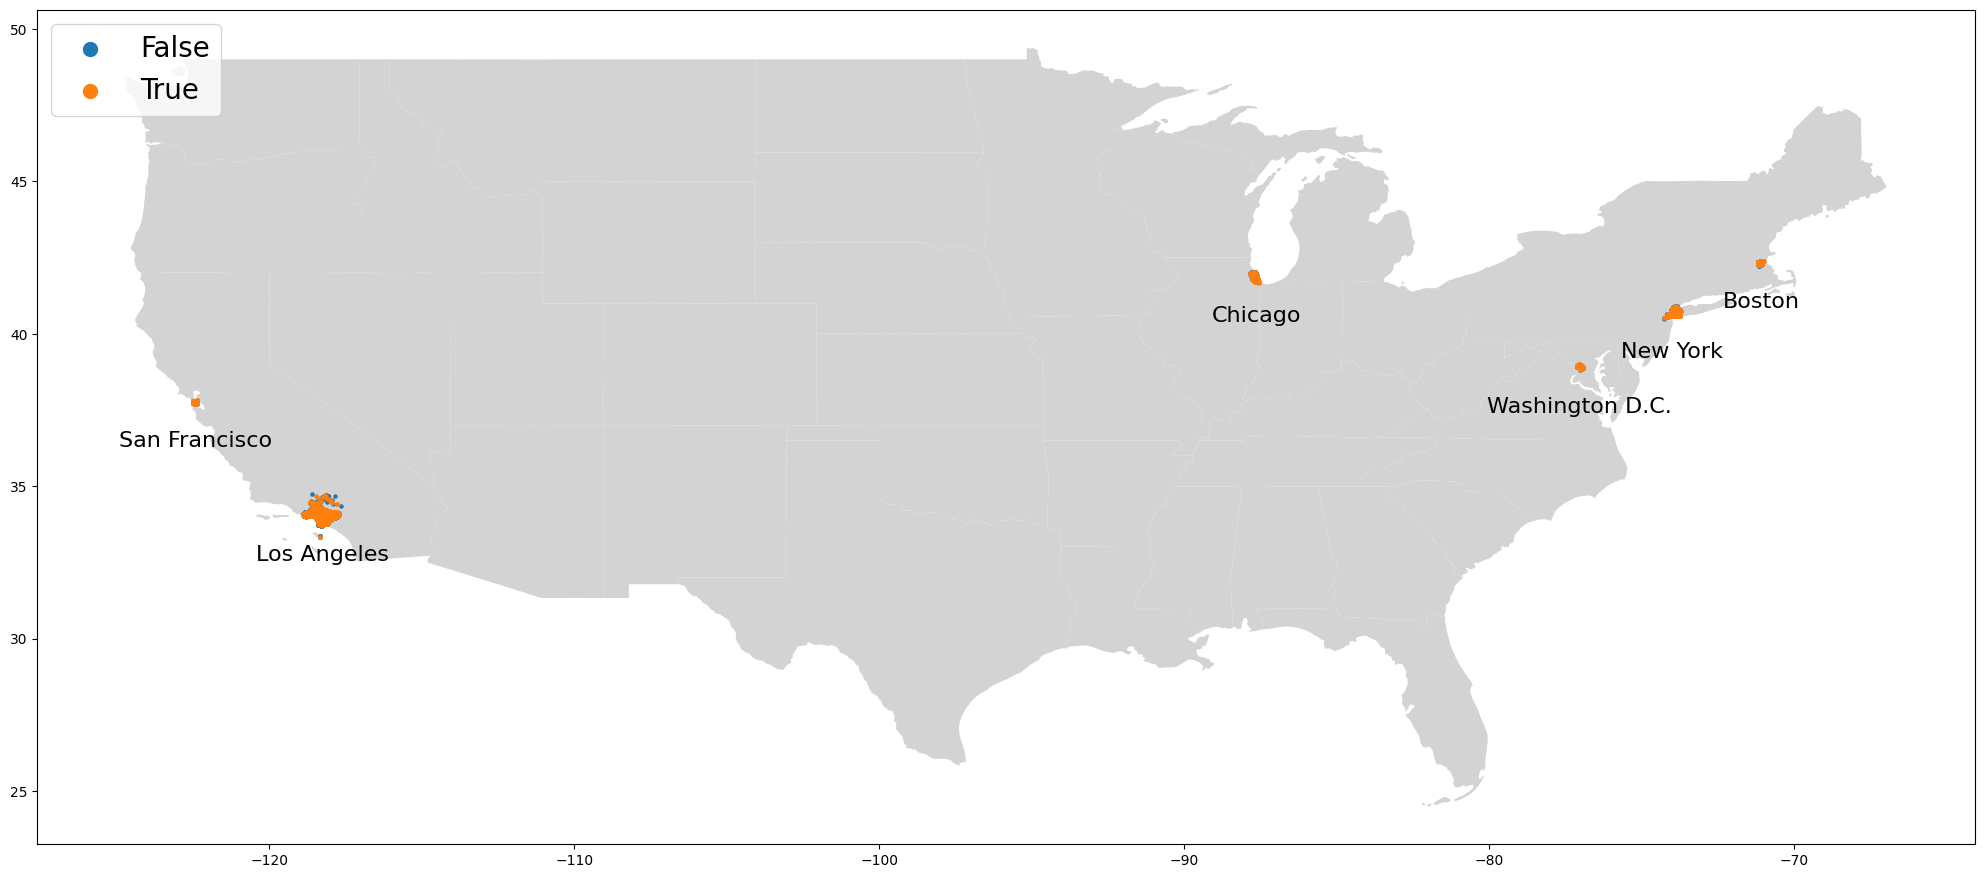

In [337]:
# instant_bookable
# cb_2022_us_nation_20m
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Load USA boundary data
usa = gpd.read_file('usa-states-census-2014.shp')

# Example DataFrame with latitude and longitude columns
# data = {'latitude': [40.7128], 'longitude': [-74.0060]}
# df = pd.DataFrame(data)

# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]


# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

grouped = gdf.groupby('instant_bookable')


# Filter points within the boundary of the USA
# gdf_within_usa = gdf[gdf.within(usa.geometry.iloc[0])]

# Plot the USA boundary
ax = usa.plot(figsize=(25, 15), color='lightgray')

text_points = {
   'New York': (-74.0060, 40.7128),
   'Los Angeles': (-118.2437, 34.0522),
   'Chicago': (-87.6298, 41.8781),
   'Boston': (-71.0589, 42.3601),
   'Washington D.C.': (-77.0369, 38.9072),
   'San Francisco': (-122.4194, 37.7749)
}

for text_city, text_point in text_points.items():
    ax.text(text_point[0], text_point[1]-1.3, text_city, fontsize=16, color='black', ha='center', va='center')
# Plot the points within the USA boundary
# gdf.plot(ax=ax, color='red', markersize=0.01)
for city, group in grouped:
    group.plot(ax=ax, markersize=5, label=city)

# Add legend
# plt.legend(loc='upper left', fontsize=20)
# handles, labels = ax.get_legend_handles_labels()
# legend = ax.legend(handles, labels, loc='lower left', handler_map={type(handles[0]): HandlerPathCollection(marker_pad=5)})
# # Show the plot

legend_handles, _ = ax.get_legend_handles_labels()
legend = ax.legend(legend_handles, grouped.groups.keys(), loc='upper left', fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([100])
plt.show()


C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\530944082.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


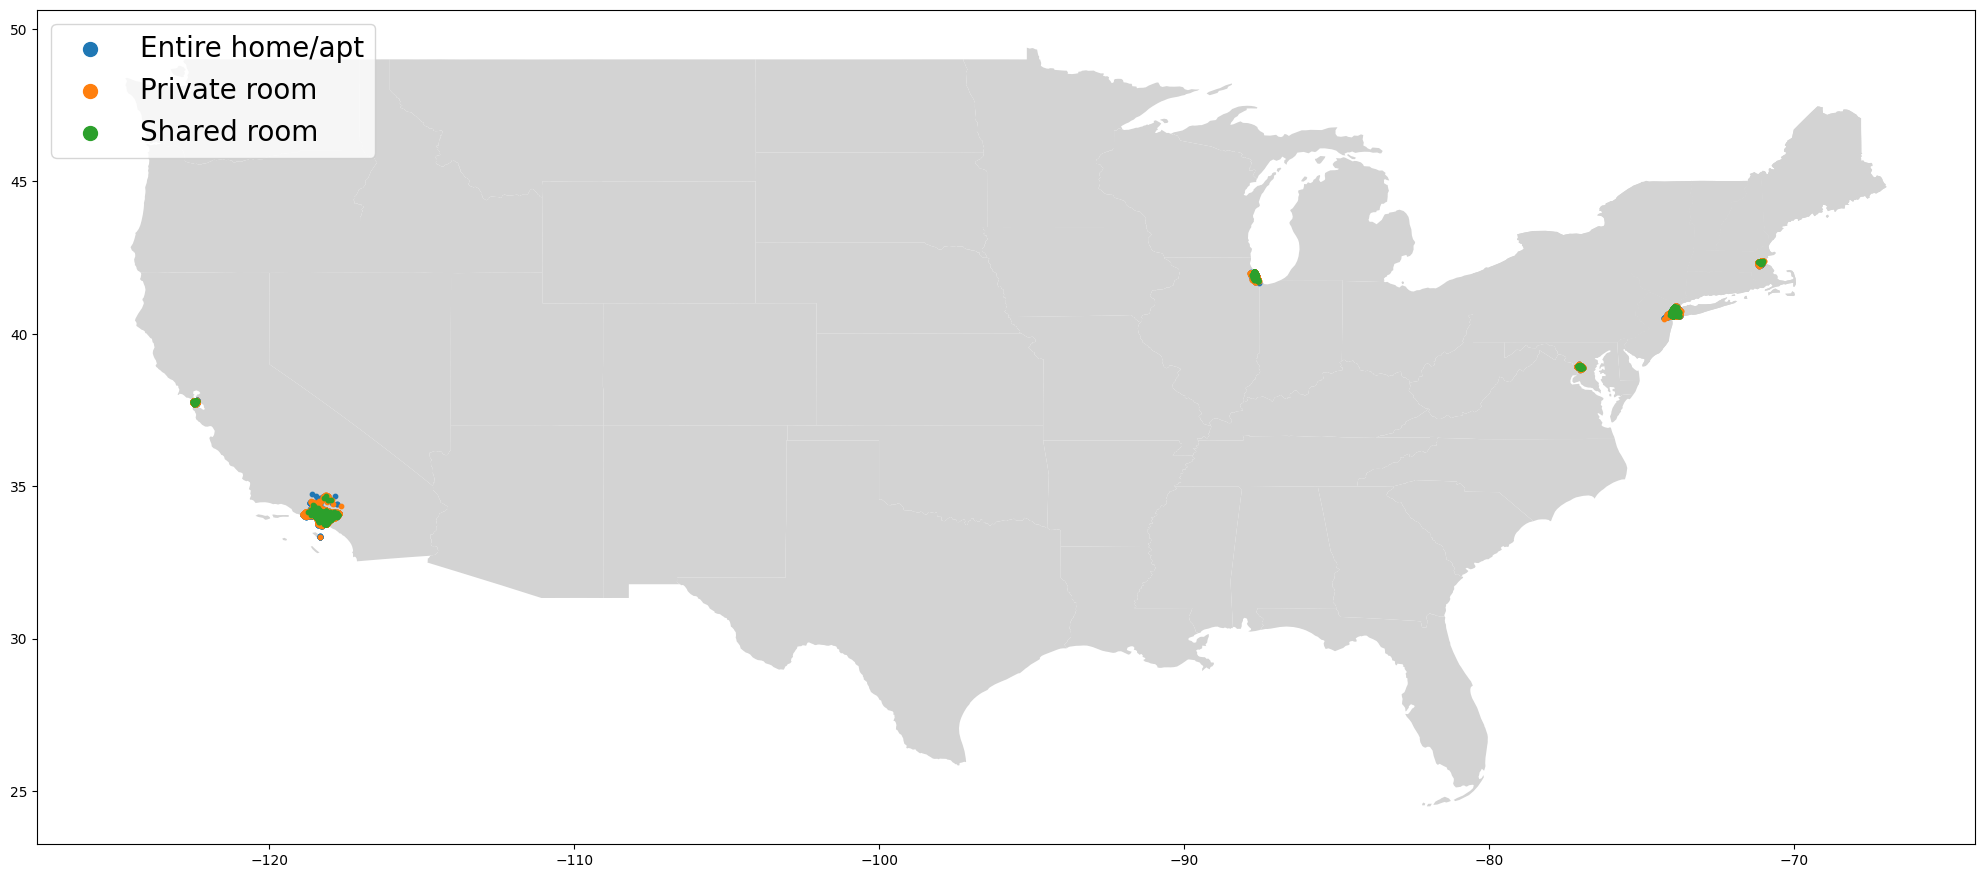

In [338]:
# cb_2022_us_nation_20m
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Load USA boundary data
usa = gpd.read_file('usa-states-census-2014.shp')

# Example DataFrame with latitude and longitude columns
# data = {'latitude': [40.7128], 'longitude': [-74.0060]}
# df = pd.DataFrame(data)

# Create Point geometries from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]


# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

grouped = gdf.groupby('room_type')


# Filter points within the boundary of the USA
# gdf_within_usa = gdf[gdf.within(usa.geometry.iloc[0])]

# Plot the USA boundary
ax = usa.plot(figsize=(25, 15), color='lightgray')

# Plot the points within the USA boundary
# gdf.plot(ax=ax, color='red', markersize=0.01)
for city, group in grouped:
    group.plot(ax=ax, markersize=10, label=city)

# Add legend
# plt.legend(loc='upper left', fontsize=20)
# handles, labels = ax.get_legend_handles_labels()
# legend = ax.legend(handles, labels, loc='lower left', handler_map={type(handles[0]): HandlerPathCollection(marker_pad=5)})
# # Show the plot

legend_handles, _ = ax.get_legend_handles_labels()
legend = ax.legend(legend_handles, grouped.groups.keys(), loc='upper left', fontsize=20)
for handle in legend.legendHandles:
    handle.set_sizes([100])
plt.show()


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62854 entries, 1 to 74110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      62854 non-null  int64         
 1   log_price               62854 non-null  float64       
 2   property_type           62854 non-null  object        
 3   room_type               62854 non-null  object        
 4   amenities               62854 non-null  object        
 5   accommodates            62854 non-null  int64         
 6   bathrooms               62854 non-null  int32         
 7   bed_type                62854 non-null  object        
 8   cancellation_policy     62854 non-null  object        
 9   cleaning_fee            62854 non-null  bool          
 10  city                    62854 non-null  object        
 11  first_review            47413 non-null  datetime64[ns]
 12  host_has_profile_pic    62854 non-null  bool       

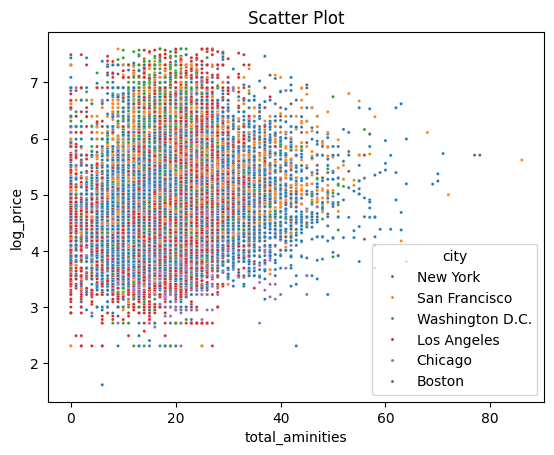

In [340]:
# host_identity_verified
sns.scatterplot(data=df, x='total_amenities', y='log_price', hue= 'city', s = 5)

# Add labels and title
plt.xlabel('total_aminities')
plt.ylabel('log_price')
plt.title('Scatter Plot')

# Show the plot
plt.show()

# total_aminities

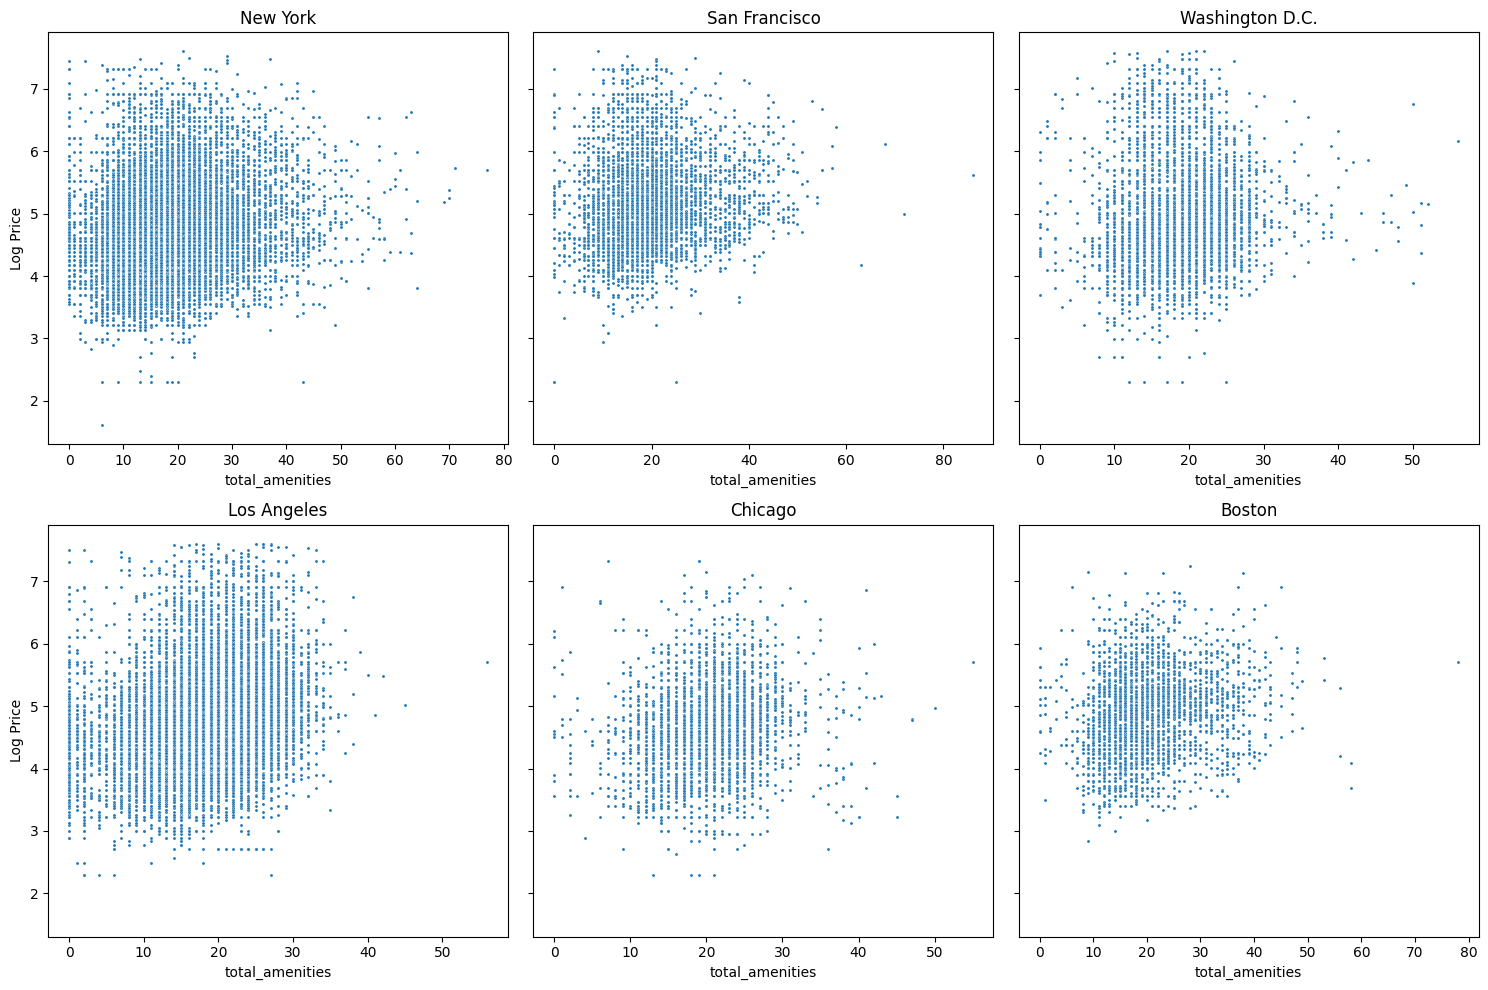

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Airbnb dataset

# Get unique cities from the DataFrame
unique_cities = df['city'].unique()

# Create subplots for 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate through each city and create a scatter plot
for i, city in enumerate(unique_cities):
    city_data = df[df['city'] == city]
    sns.scatterplot(data=city_data, x='total_amenities', y='log_price', ax=axs[i], s=5)
    axs[i].set_xlabel('total_amenities')
    axs[i].set_ylabel('Log Price')
    axs[i].set_title(city)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


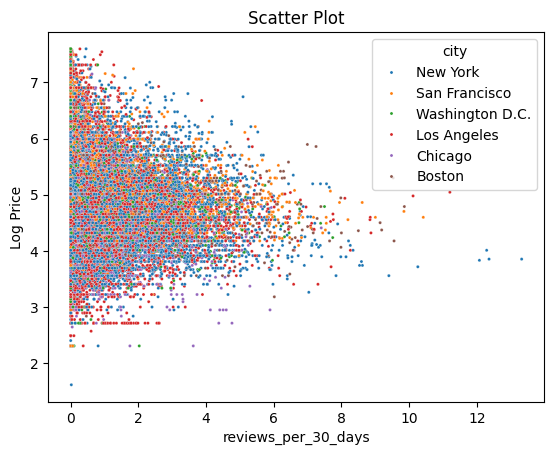

In [363]:
sns.scatterplot(data=df, x='reviews_per_30_days', y='log_price', hue='city', s=5)

# Add labels and title
plt.xlabel('reviews_per_30_days')
plt.ylabel('Log Price')
plt.title('Scatter Plot')

# Show the plot
plt.show()

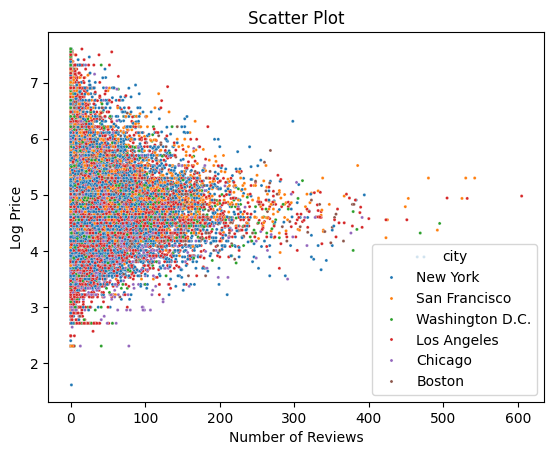

In [342]:

sns.scatterplot(data=df, x='number_of_reviews', y='log_price', hue='city', s=5)

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Scatter Plot')

# Show the plot
plt.show()

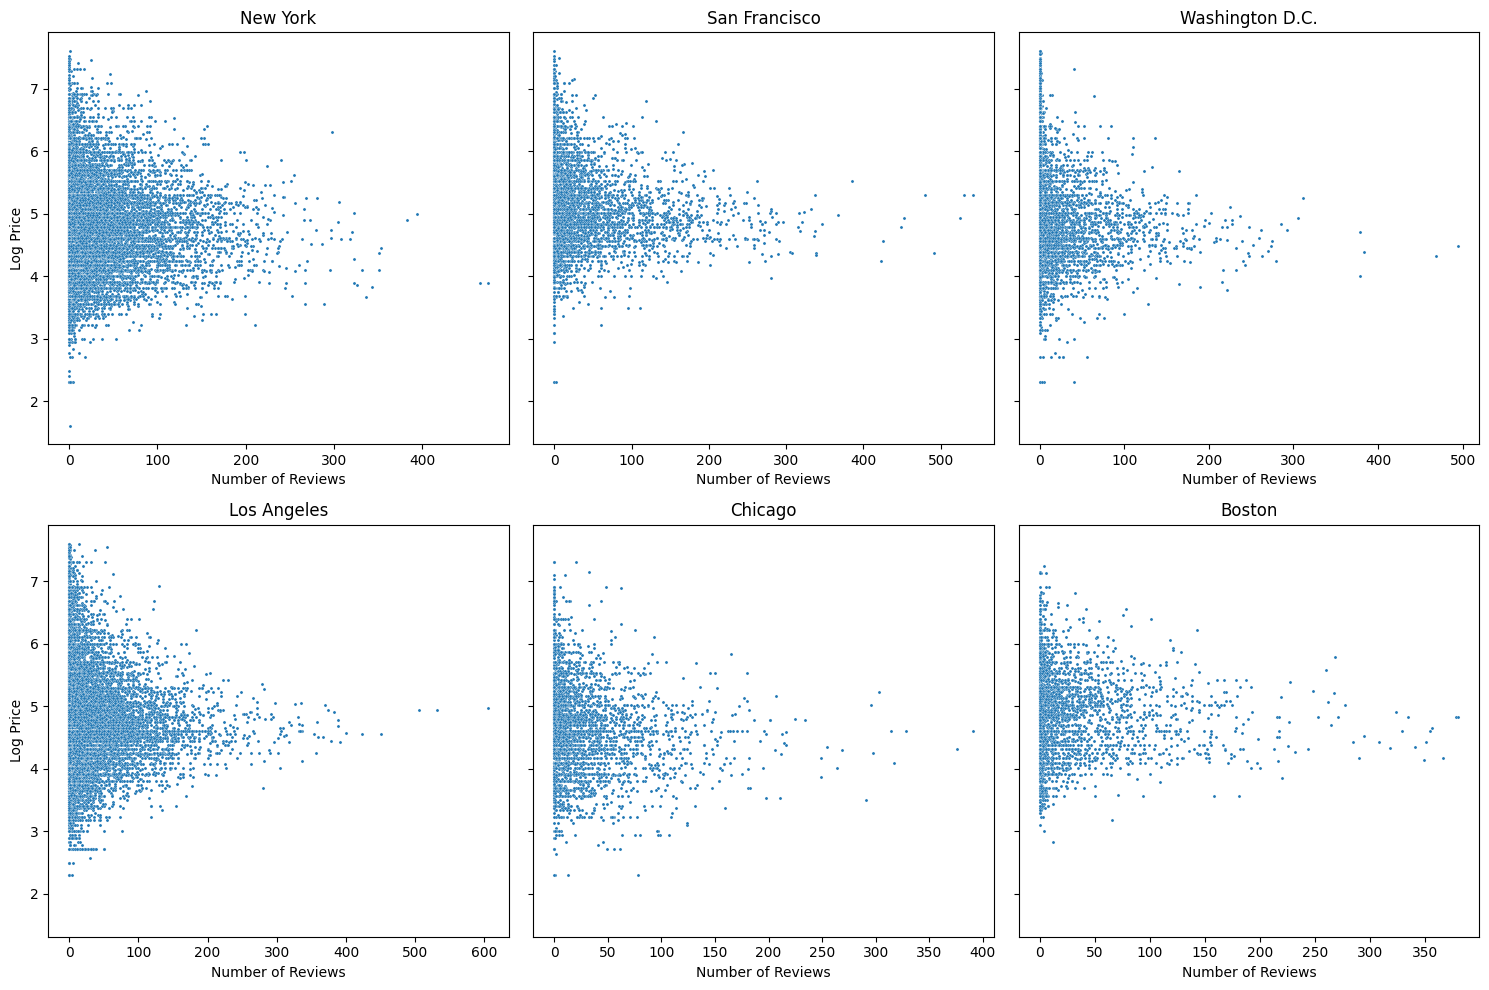

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Airbnb dataset

# Get unique cities from the DataFrame
unique_cities = df['city'].unique()

# Create subplots for 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate through each city and create a scatter plot
for i, city in enumerate(unique_cities):
    city_data = df[df['city'] == city]
    sns.scatterplot(data=city_data, x='number_of_reviews', y='log_price', ax=axs[i], s=5)
    axs[i].set_xlabel('Number of Reviews')
    axs[i].set_ylabel('Log Price')
    axs[i].set_title(city)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


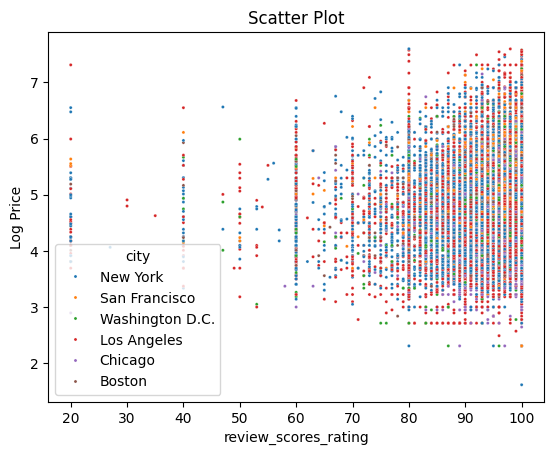

In [344]:
sns.scatterplot(data=df, x='review_scores_rating', y='log_price', hue='city', s=5)

# Add labels and title
plt.xlabel('review_scores_rating')
plt.ylabel('Log Price')
plt.title('Scatter Plot')

# Show the plot
plt.show()

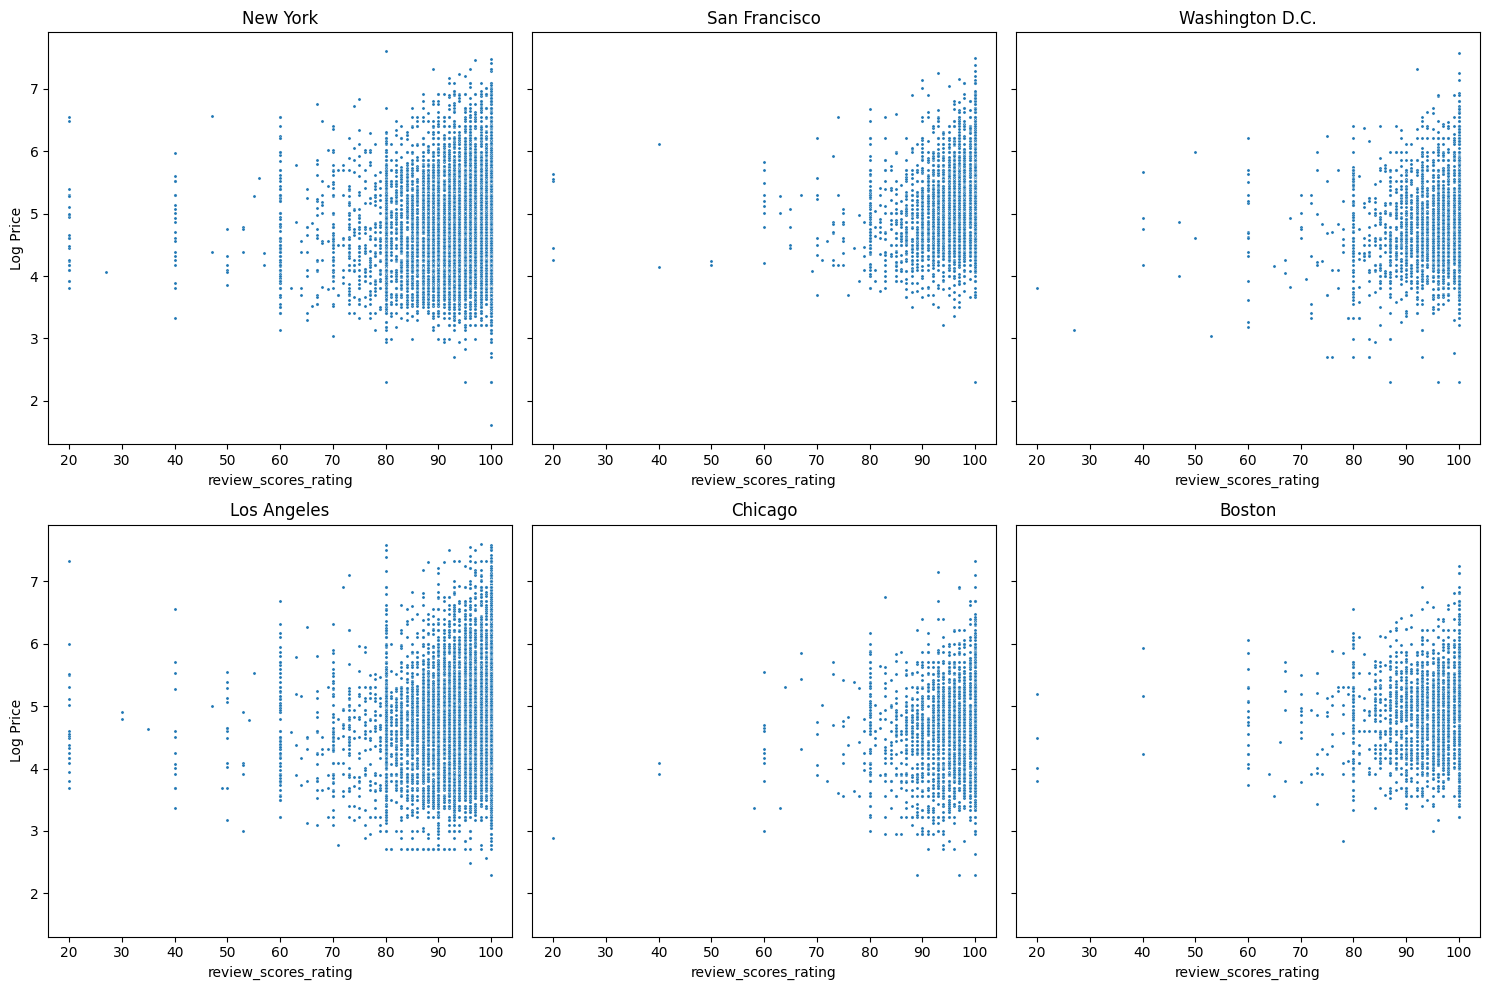

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Airbnb dataset

# Get unique cities from the DataFrame
unique_cities = df['city'].unique()

# Create subplots for 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate through each city and create a scatter plot
for i, city in enumerate(unique_cities):
    city_data = df[df['city'] == city]
    sns.scatterplot(data=city_data, x='review_scores_rating', y='log_price', ax=axs[i], s=5)
    axs[i].set_xlabel('review_scores_rating')
    axs[i].set_ylabel('Log Price')
    axs[i].set_title(city)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


) missing from current font.\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


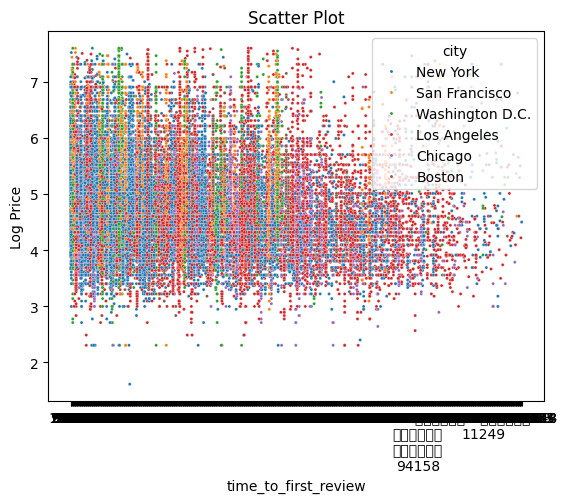

In [365]:
sns.scatterplot(data=df, x='zipcode', y='log_price', hue='city', s=5)

# Add labels and title
plt.xlabel('time_to_first_review')
plt.ylabel('Log Price')
plt.title('Scatter Plot')

# Show the plot
plt.show()

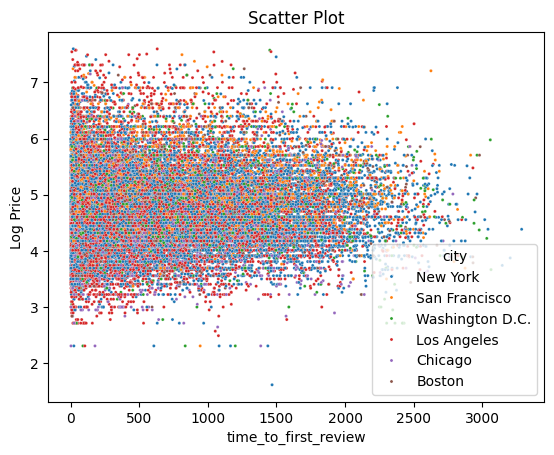

In [346]:
sns.scatterplot(data=df, x='time_to_first_review', y='log_price', hue='city', s=5)

# Add labels and title
plt.xlabel('time_to_first_review')
plt.ylabel('Log Price')
plt.title('Scatter Plot')

# Show the plot
plt.show()

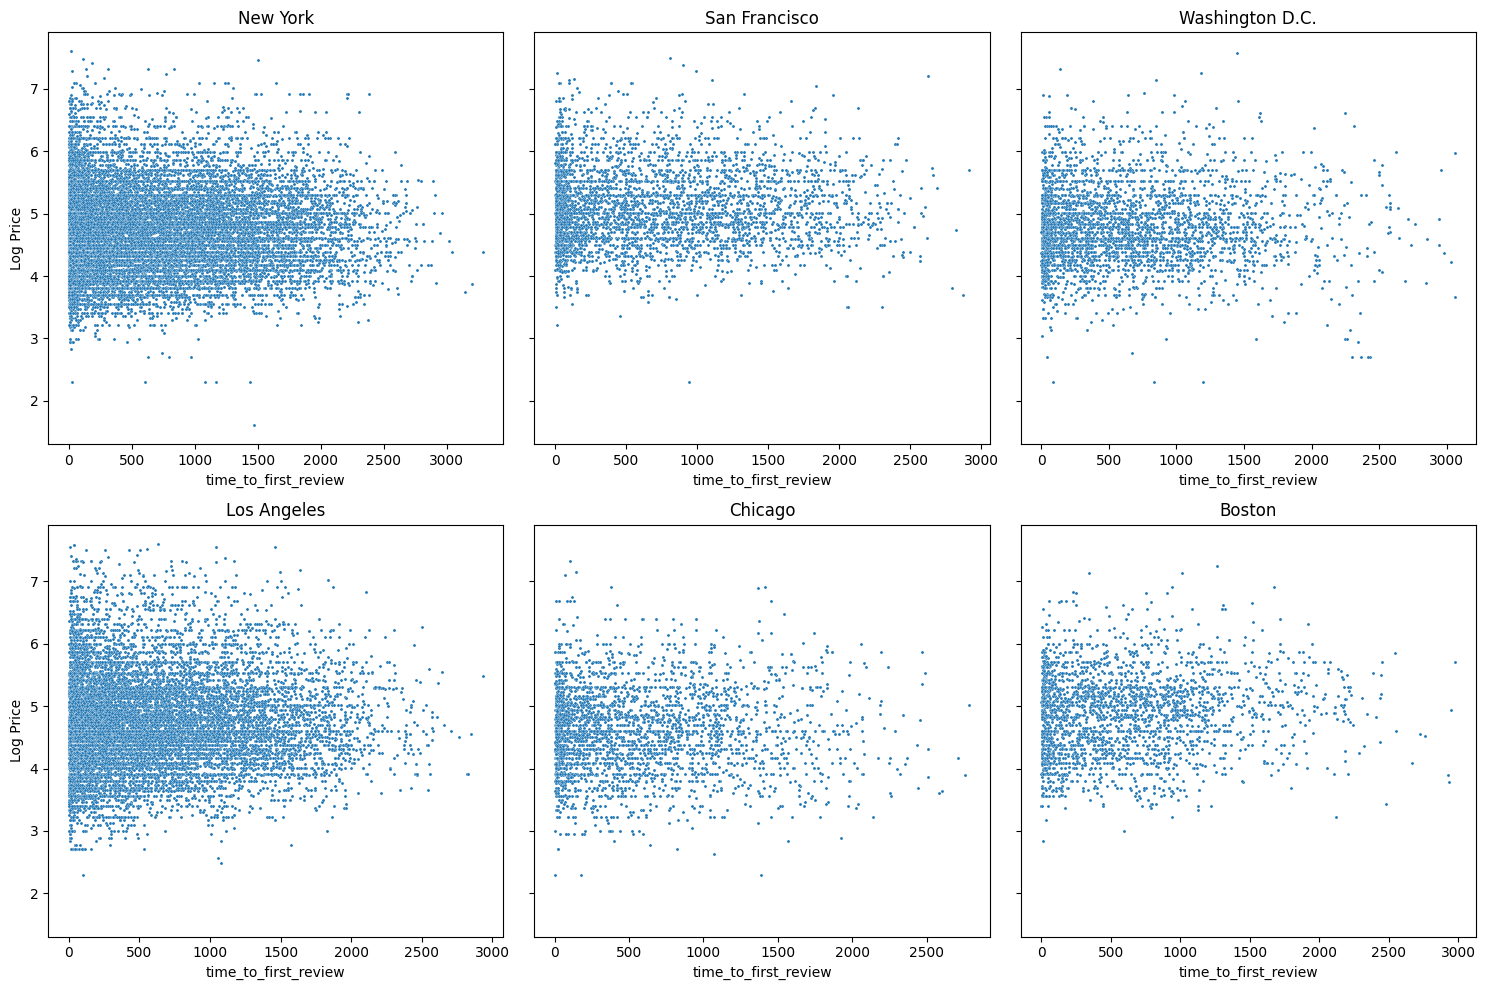

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Airbnb dataset

# Get unique cities from the DataFrame
unique_cities = df['city'].unique()

# Create subplots for 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate through each city and create a scatter plot
for i, city in enumerate(unique_cities):
    city_data = df[df['city'] == city]
    sns.scatterplot(data=city_data, x='time_to_first_review', y='log_price', ax=axs[i], s=5)
    axs[i].set_xlabel('time_to_first_review')
    axs[i].set_ylabel('Log Price')
    axs[i].set_title(city)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


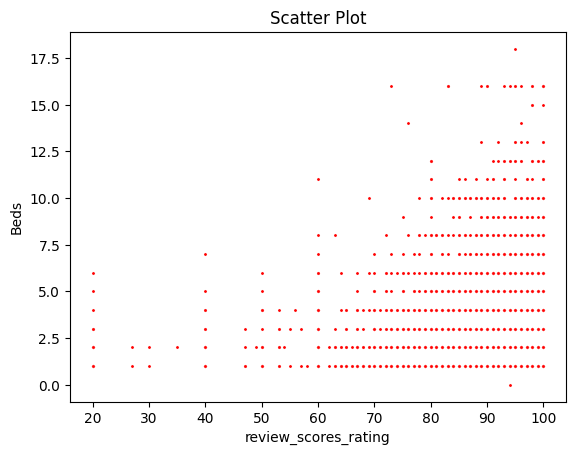

In [348]:
sns.scatterplot(data=df, x='review_scores_rating', y='beds', color = 'red', s=5)

# Add labels and title
plt.xlabel('review_scores_rating')
plt.ylabel('Beds')
plt.title('Scatter Plot')

# Show the plot
plt.show()

C:\Users\Vasu Namdev\AppData\Local\Temp\ipykernel_13004\1812405540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=neighbourhood_df.head(20), x='Frequency', y='neighbourhood', palette='viridis')


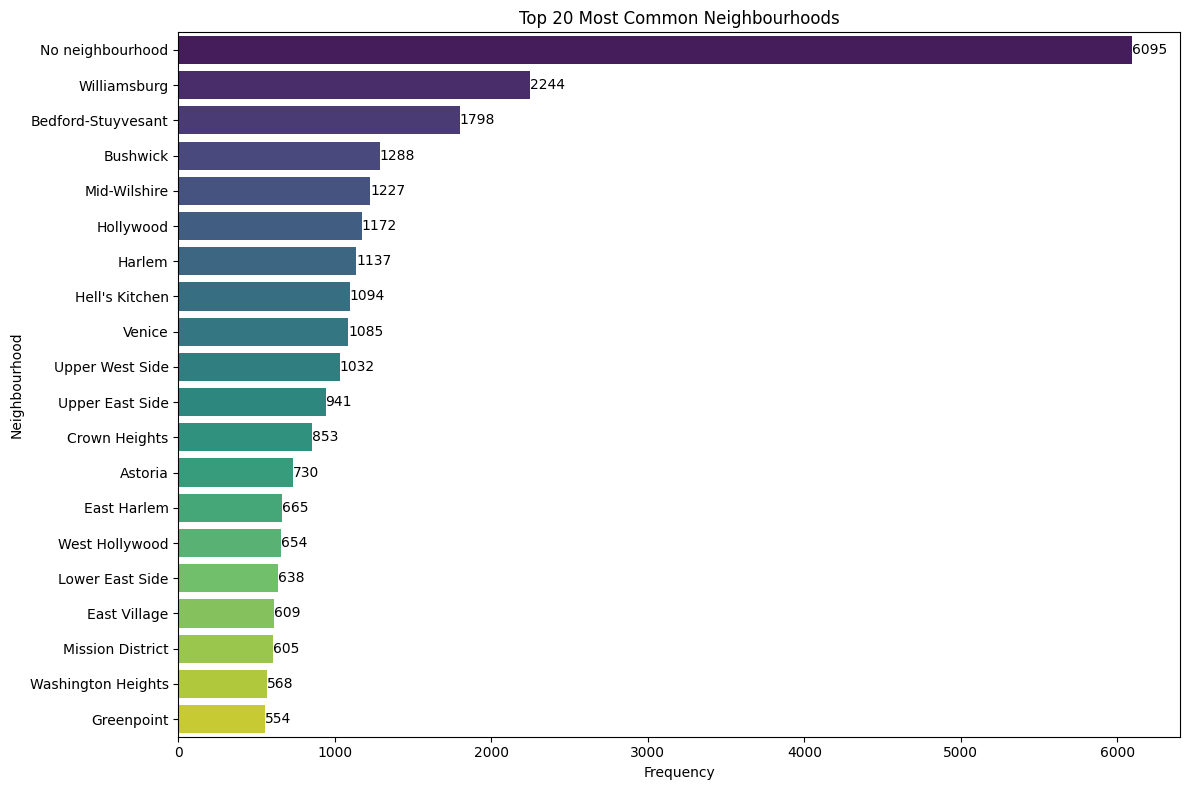

In [349]:

# Create a DataFrame to count the frequency of each neighborhood
neighbourhood_df = df['neighbourhood'].value_counts().reset_index()
neighbourhood_df.columns = ['neighbourhood', 'Frequency']
neighbourhood_df = neighbourhood_df.sort_values(by='Frequency', ascending=False)

# Plotting the barplot with annotations
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=neighbourhood_df.head(20), x='Frequency', y='neighbourhood', palette='viridis')

# Add annotations (values) to the bars
for index, row in neighbourhood_df.head(20).iterrows():
    barplot.text(row['Frequency'] + 0.1, index, f'{row["Frequency"]}', color='black', ha="left", va='center')

plt.xlabel('Frequency')
plt.ylabel('Neighbourhood')
plt.title('Top 20 Most Common Neighbourhoods')
plt.tight_layout()
plt.show()




In [350]:
df.describe()

id     log_price  accommodates     bathrooms  \
count  6.285400e+04  62854.000000  62854.000000  62854.000000   
mean   1.127344e+07      4.788874      3.229086      1.204044   
min    3.440000e+02      1.609438      1.000000      0.000000   
25%    6.261097e+06      4.317488      2.000000      1.000000   
50%    1.227508e+07      4.727388      2.000000      1.000000   
75%    1.640251e+07      5.236442      4.000000      1.000000   
max    2.123090e+07      7.600402     16.000000      8.000000   
std    6.087883e+06      0.727852      2.228404      0.563814   

                        first_review                     host_since  \
count                          47413                          62854   
mean   2016-01-28 03:31:26.748359936  2014-08-06 07:51:21.312247552   
min              2009-01-20 00:00:00            2008-03-03 00:00:00   
25%              2015-06-26 00:00:00            2013-05-03 00:00:00   
50%              2016-06-18 00:00:00            2014-10-20 00:00:00   
75%              2017-02-02 00:00:00            2016-01-19 00:00:00   
max              2017-10-05 00:00:00            2017-10-04 00:00:00   
std                              NaN                            NaN   

                         last_review      latitude     longitude  \
count                          47413  62854.000000  62854.000000   
mean   2017-05-09 15:50:22.943074560     38.348425    -93.076574   
min              2010-07-17 00:00:00     33.338905   -122.511500   
25%              2017-04-06 00:00:00     34.110272   -118.345827   
50%              2017-05-06 00:00:00     40.643696    -77.020283   
75%              2017-09-15 00:00:00     40.746706    -73.954951   
max              2017-10-05 00:00:00     42.390437    -70.985047   
std                              NaN      3.127710     21.741435   

       number_of_reviews  review_scores_rating      bedrooms          beds  \
count       62854.000000          47067.000000  62854.000000  62854.000000   
mean           23.203472             94.223915      1.281700      1.750247   
min             0.000000             20.000000      0.000000      0.000000   
25%             1.000000             92.000000      1.000000      1.000000   
50%             7.000000             96.000000      1.000000      1.000000   
75%            28.000000             99.000000      1.000000      2.000000   
max           605.000000            100.000000     10.000000     18.000000   
std            39.977941              7.161277      0.871104      1.296285   

       time_to_first_review  reviews_per_30_days  total_amenities  
count          47413.000000         62854.000000     62854.000000  
mean             583.972834             0.666706        18.071674  
min                0.000000             0.000000         0.000000  
25%               82.000000             0.013903        13.000000  
50%              403.000000             0.217048        18.000000  
75%              935.000000             0.863288        22.000000  
max             3287.000000            13.324251        86.000000  
std              580.400000             1.042077         7.074618

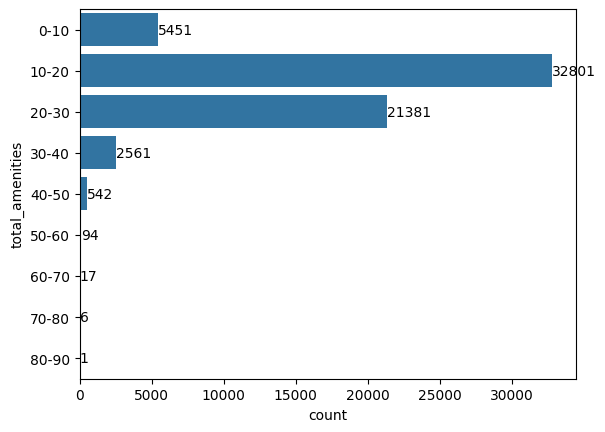

In [351]:
# total_amenities

import seaborn as sns
import pandas as pd
import numpy as np

df_copy = pd.DataFrame()

# Define the bins for labeling
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Create a new column for the bin labels
df_copy['total_amenities'] = pd.cut(df['total_amenities'], bins=bins, labels=labels, right=False)

# Plot the countplot
ax = sns.countplot(y='total_amenities', data=df_copy)

# Label the bars
for bars in ax.containers:
    ax.bar_label(bars)
    
# Show the plot
plt.show()


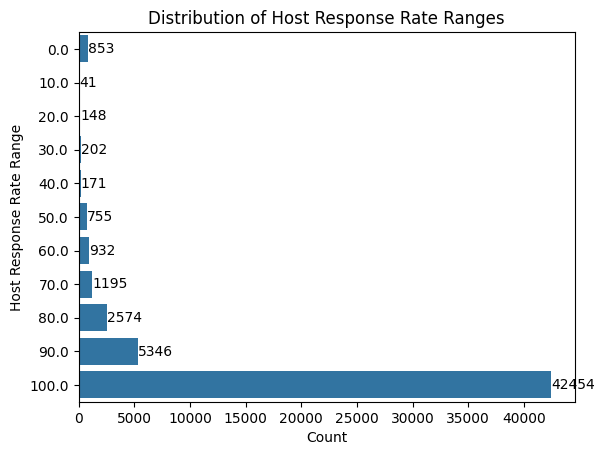

In [352]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# data = {'host_response_rate': ['100%', '90%', '75%', '80%', '95%', '70%', '50%', '85%', '60%', '40%']}
df_host = pd.DataFrame()

# Convert host_response_rate to numeric and divide by 10 to get range
df_host['response_range'] = pd.to_numeric(df['host_response_rate'].str.rstrip('%')) // 10 * 10

# Create countplot
ax = sns.countplot(y='response_range', data=df_host)

# Label bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set labels
plt.xlabel('Count')
plt.ylabel('Host Response Rate Range')
plt.title('Distribution of Host Response Rate Ranges')

plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


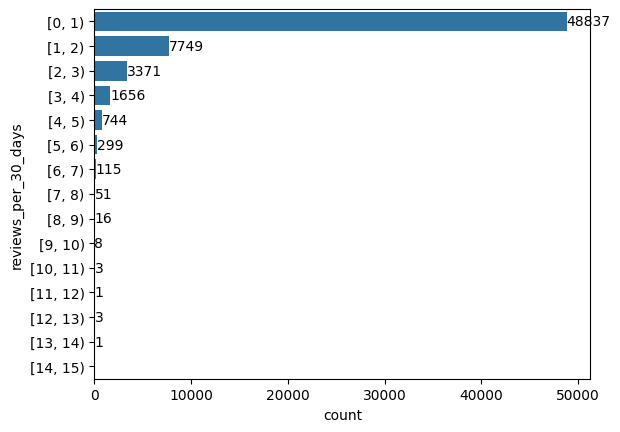

In [353]:
bins = np.arange(0, 16, 1)
print(bins)

# Create a new column for the bin labels
df_copy['reviews_per_30_days'] = pd.cut(df['reviews_per_30_days'], bins=bins, right=False)

# Plot the countplot
ax = sns.countplot(y='reviews_per_30_days', data=df_copy)

for bars in ax.containers:
    ax.bar_label(bars)
# Show the plot
plt.show()

In [364]:
df

id  log_price property_type        room_type  \
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
5      12422935   4.442651     Apartment     Private room   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
1      Wireless Internet,Air conditioning,Kitchen,Hea...             7   
2      TV,Cable TV,Wireless Internet,Air conditioning...             5   
3      TV,Cable TV,Internet,Wireless Internet,Kitchen...             4   
4      TV,Internet,Wireless Internet,Air conditioning...             2   
5      TV,Wireless Internet,Heating,Smoke detector,Ca...             2   
...                                                  ...           ...   
74106                                                                1   
74107  TV,Cable TV,Internet,Wireless Internet,Kitchen...             4   
74108  TV,Internet,Wireless Internet,Air conditioning...             5   
74109  TV,Wireless Internet,Air conditioning,Kitchen,...             2   
74110  TV,Internet,Wireless Internet,Kitchen,Free par...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee             city  \
1              1  Real Bed              strict          True         New York   
2              1  Real Bed            moderate          True         New York   
3              1  Real Bed            flexible          True    San Francisco   
4              1  Real Bed            moderate          True  Washington D.C.   
5              1  Real Bed              strict          True    San Francisco   
...          ...       ...                 ...           ...              ...   
74106          1  Real Bed            flexible         False         New York   
74107          2  Real Bed            moderate          True      Los Angeles   
74108          1  Real Bed            moderate          True         New York   
74109          1  Real Bed              strict          True         New York   
74110          1  Real Bed            moderate         False      Los Angeles   

      first_review  host_has_profile_pic  host_identity_verified  \
1       2017-08-05                  True                   False   
2       2017-04-30                  True                    True   
3              NaT                  True                    True   
4       2015-05-12                  True                    True   
5       2017-08-27                  True                    True   
...            ...                   ...                     ...   
74106          NaT                  True                    True   
74107   2016-08-15                  True                   False   
74108   2015-01-03                  True                    True   
74109          NaT                  True                   False   
74110   2013-09-05                  True                    True   

      host_response_rate host_since  instant_bookable last_review   latitude  \
1                   100% 2017-06-19              True  2017-09-23  40.766115   
2                   100% 2016-10-25              True  2017-09-14  40.808110   
3                    NaN 2015-04-19             False         NaT  37.772004   
4                   100% 2015-03-01              True  2017-01-22  38.925627   
5                   100% 2017-06-07              True  2017-09-05  37.753164   
...                  ...        ...               ...         ...        ...   
74106                NaN 2013-03-24      